# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.78'

## Specifying filetype, and folder as before

In [2]:
# This specifies what file type your Raman exported in. 
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\penny\\Box\\Berkeley_new\\DiadFit_outer\\Unit_tests\\settings.txt'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [ ]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong'). After selecting one, go through and select another one and run again from here. 
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

### Now load one file from this group to tweak parameters for

In [4]:
Diad_Files =GroupN_df['filename']
i=0


### Lets plot the diad to have a look at it

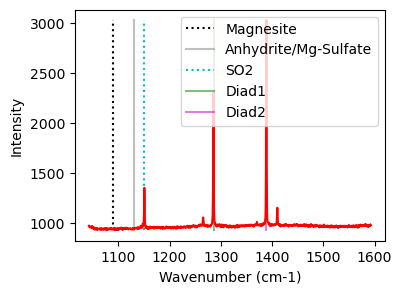

In [5]:
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [6]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [6]:
model_name='PseudoVoigtModel'
diad1_fit_config_weak=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30,
     y_range_baseline=100,
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i],
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])

Diad1_fit_weak=pf.fit_diad_1_w_bck(config1=diad1_fit_config_weak,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])


NameError: name 'GroupN_df' is not defined

In [4]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1240),
    upper_bck_diad1=(1315, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

NameError: name 'batch' is not defined

### See what these fit parameters look like for diad1

In [3]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=Diad_Files.iloc[0],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

NameError: name 'diad1_fit_config_init' is not defined

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [9]:
diad1_fit_config2=diad1_fit_config_init

## Fit diad2

In [10]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=2, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.4,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=2, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.4, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=2243.7095837782394, HB_prom=178.5174353119412, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_cent_err  Diad2_Voigt_Area  \
0          1388.851553       1388.851503        0.001377       3187.505354   

   Diad2_Voigt_Sigma  Diad2_Voigt_Gamma     HB2_Cent    HB2_Area  HB2_Sigma  \
0           0.508942                  0  1410.162753  310.065702   0.660575   

   Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  Diad2_fwhm  \
0            2432.162993        5.184158        0.537581    1.017884   

         Diad2_refit  Diad2_Asym50  Diad2_Asym70  Diad2_Yuan2017_sym_factor  \
0  Flagged Warnings:      1.100917           1.1                   0.102722   

   Diad2_Remigi2021_BSF  
0              0.000419

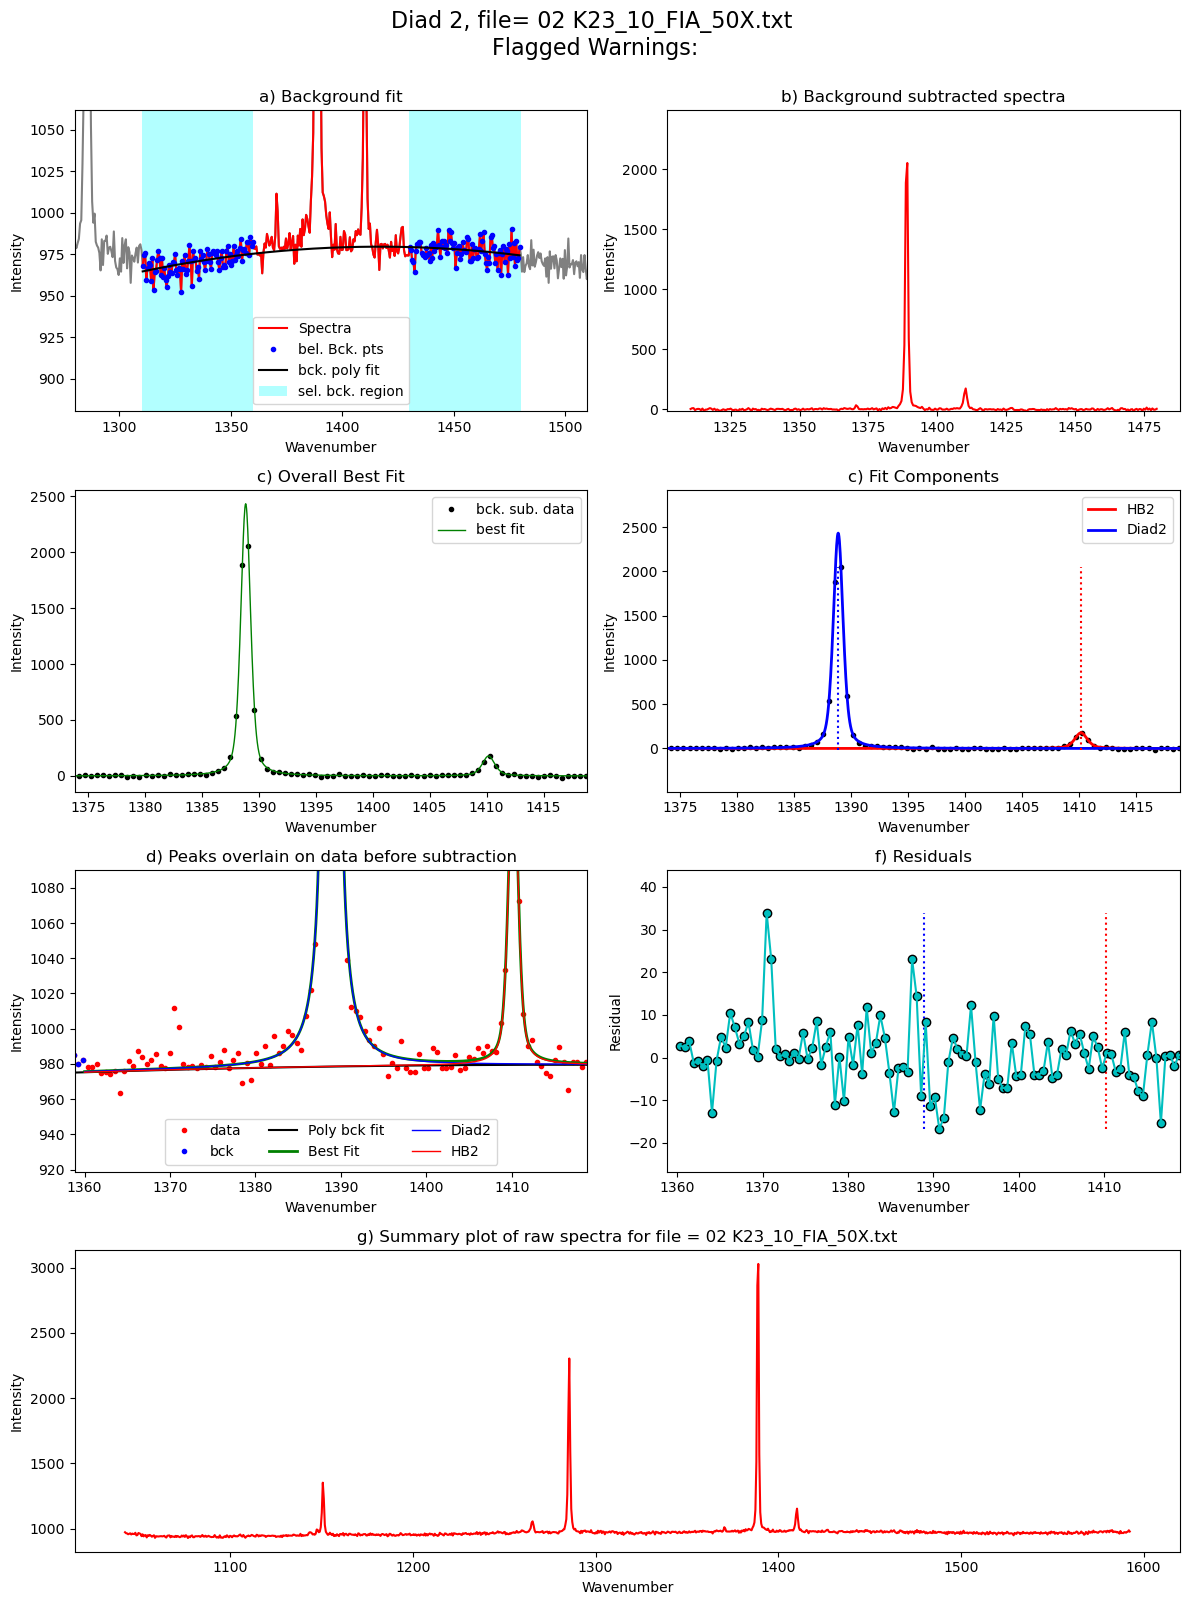

In [11]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=Diad_Files[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

## Loop over all the files in the group
- This will loop over all the 

  0%|          | 0/16 [00:00<?, ?it/s]

Processing file: 02 K23_10_FIA_50X.txt


  6%|▋         | 1/16 [00:09<02:17,  9.15s/it]

Processing file: 05 K23_1_FIA_50X.txt


 12%|█▎        | 2/16 [00:18<02:10,  9.35s/it]

Processing file: 06 K23_1_FIA_50X_r2_longeraq.txt


 19%|█▉        | 3/16 [00:28<02:04,  9.58s/it]

Processing file: 08 K23_2_FIA_50X.txt


 25%|██▌       | 4/16 [00:36<01:49,  9.09s/it]

Processing file: 09 K23_2_FIB_50X.txt


 31%|███▏      | 5/16 [00:45<01:36,  8.81s/it]

Processing file: 11 K23_2_FIC_50X_CRR_DiadFit.txt


 38%|███▊      | 6/16 [00:48<01:09,  6.99s/it]

Processing file: 13 K23_4_FIA_50X_CRR_DiadFit.txt


 44%|████▍     | 7/16 [00:54<00:59,  6.57s/it]

Processing file: 14 K23_4_FIB_50X.txt


 50%|█████     | 8/16 [01:02<00:56,  7.10s/it]

Processing file: 16 K23_6_FIA_50X.txt


 56%|█████▋    | 9/16 [01:12<00:55,  7.96s/it]

Processing file: 17 K23_7_FIA_50X.txt


 62%|██████▎   | 10/16 [01:21<00:49,  8.30s/it]

Processing file: 19 K23_7_FIB_50X.txt


c:\users\penny\box\berkeley_new\diadfit_outer\src\DiadFit\diads.py:3008: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(12, 16))
 69%|██████▉   | 11/16 [01:30<00:43,  8.61s/it]

Processing file: 20 K23_7_FIC_50X_CRR_DiadFit.txt


 75%|███████▌  | 12/16 [01:40<00:35,  8.94s/it]

Processing file: 21 K23_9_FIA_50X_CRR_DiadFit.txt


 81%|████████▏ | 13/16 [01:49<00:26,  8.87s/it]

Processing file: 23 K23_101_FID_50X.txt


 88%|████████▊ | 14/16 [01:57<00:17,  8.83s/it]

Processing file: 24 K23_101_FIC_50X_CRR_DiadFit.txt


 94%|█████████▍| 15/16 [02:07<00:09,  9.01s/it]

Processing file: 26 K23_102_FIA_CRR_DiadFit.txt


100%|██████████| 16/16 [02:16<00:00,  8.55s/it]


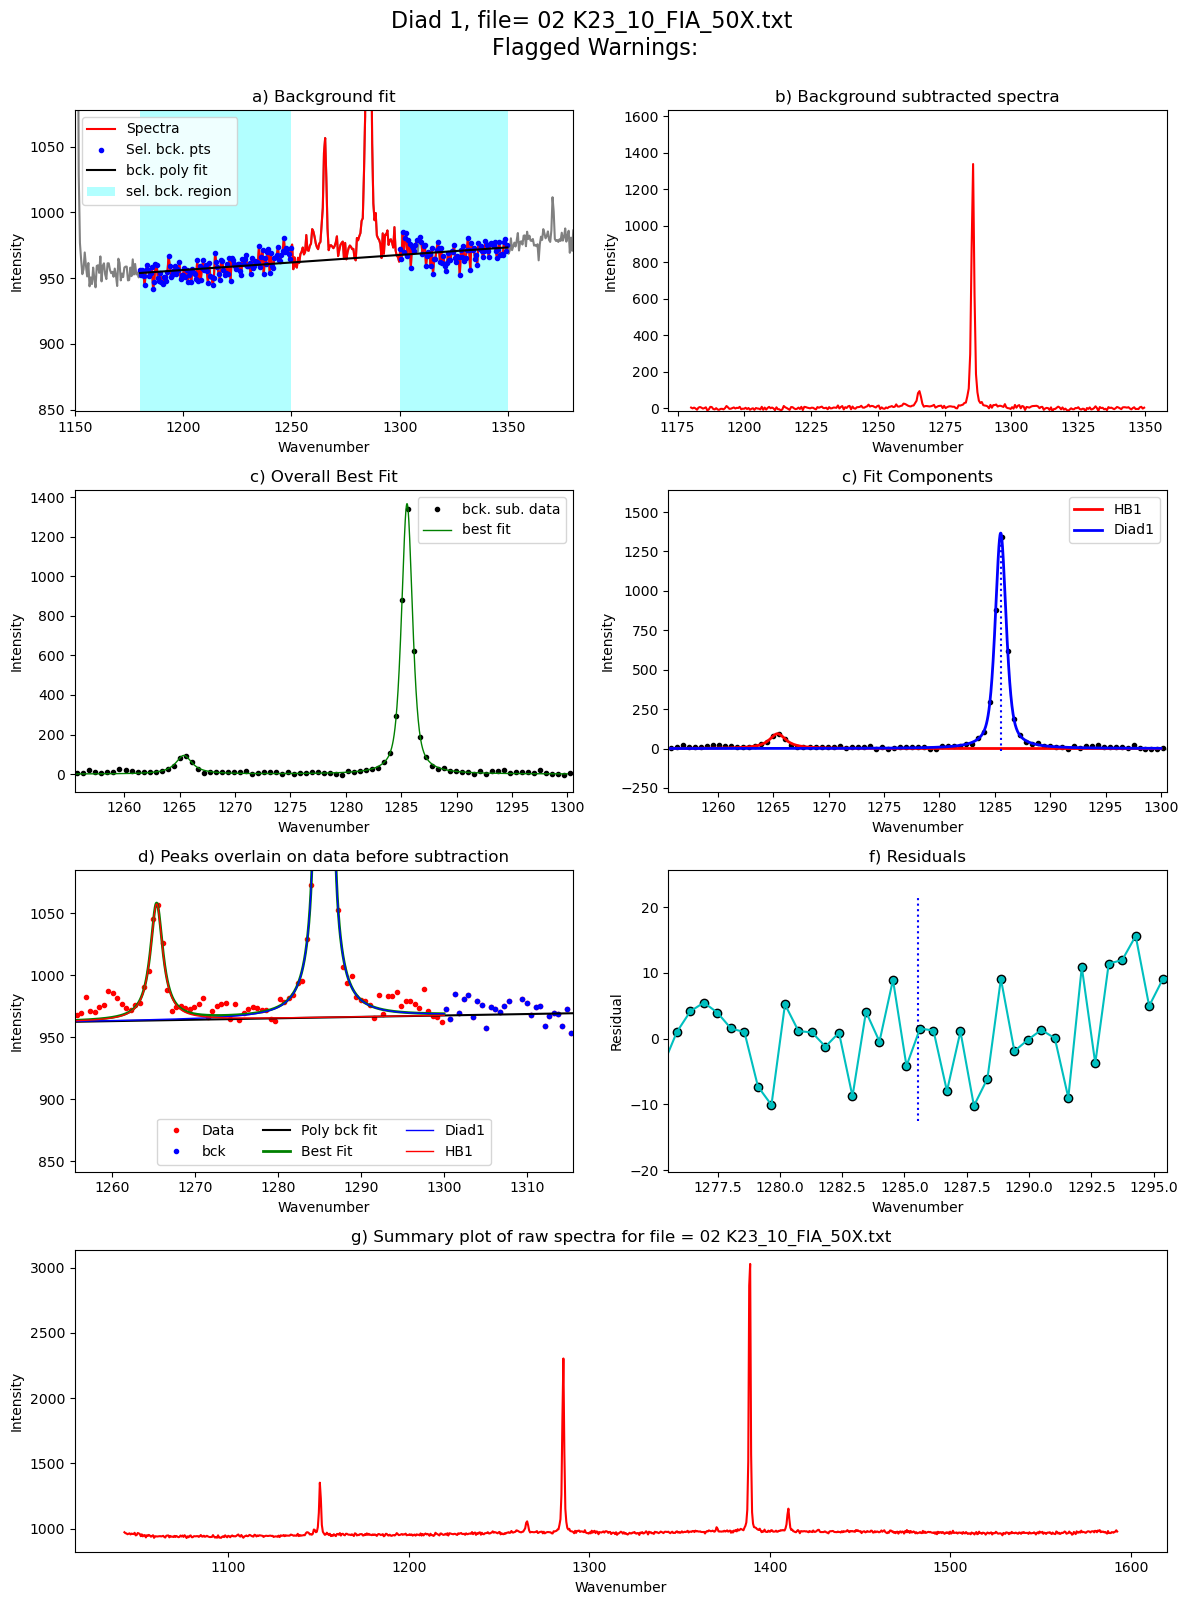

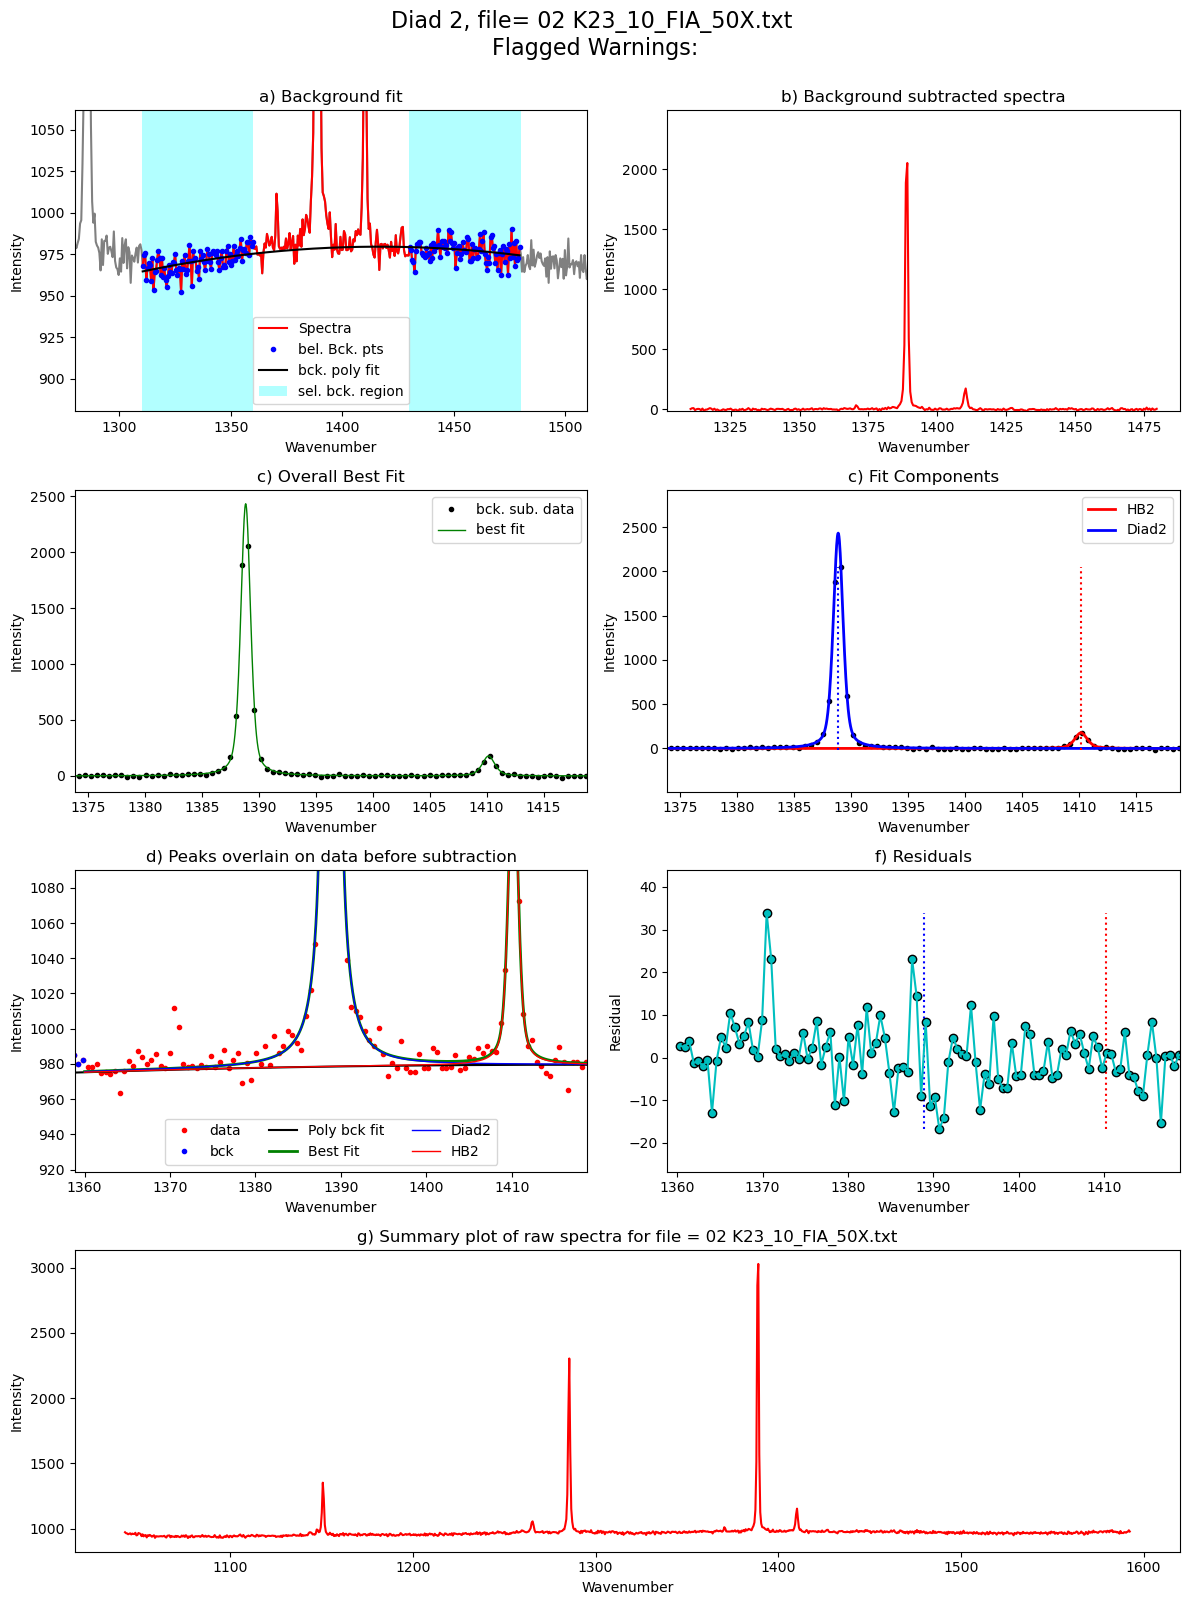

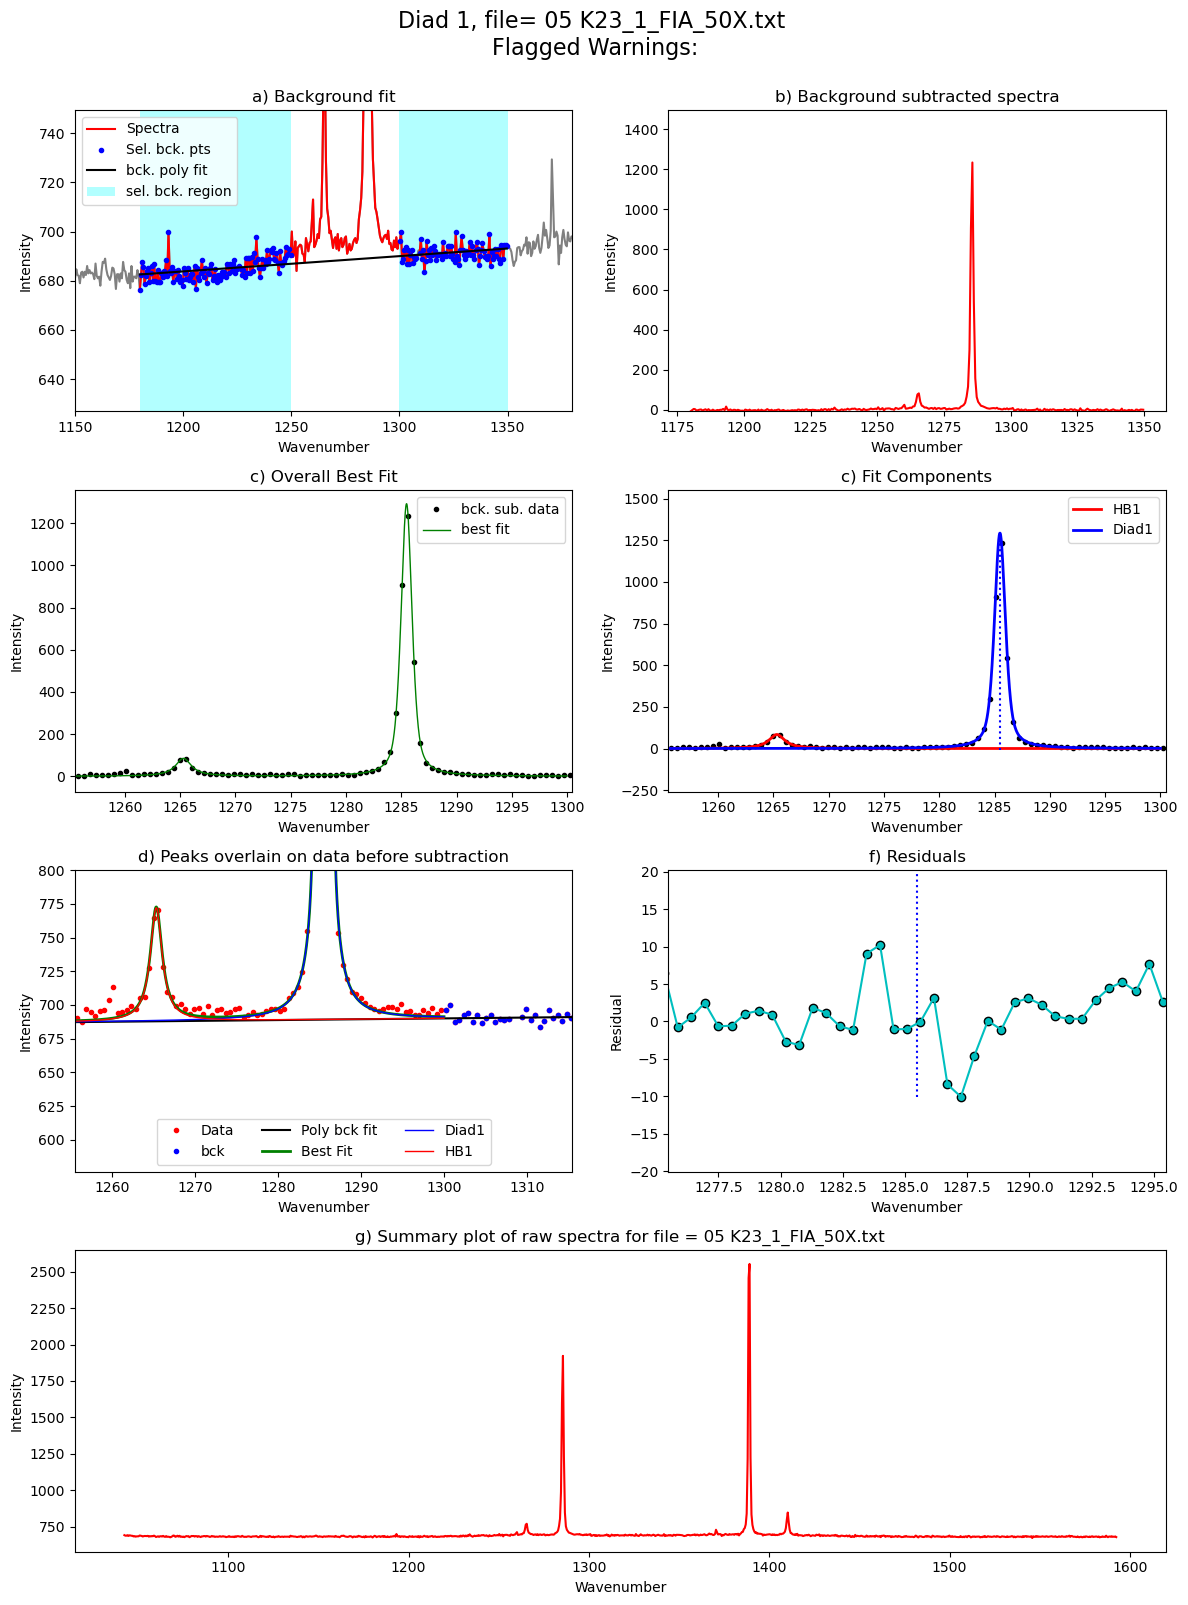

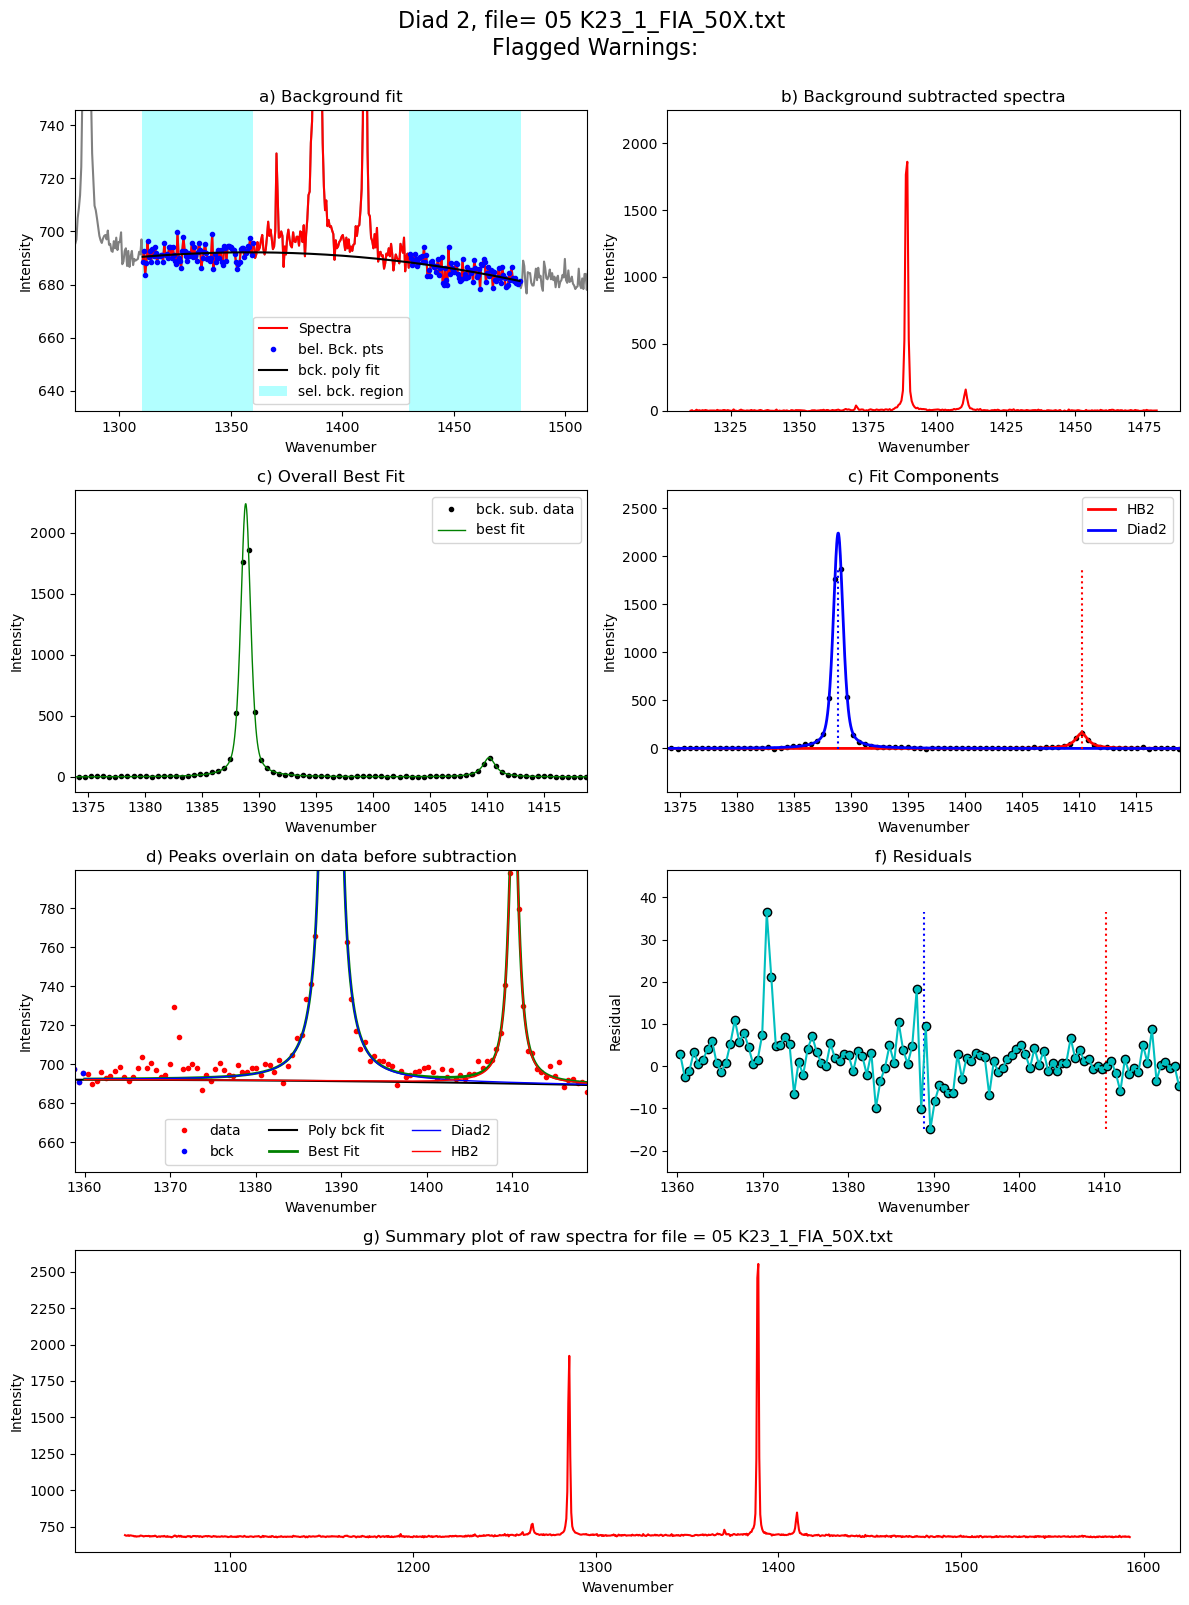

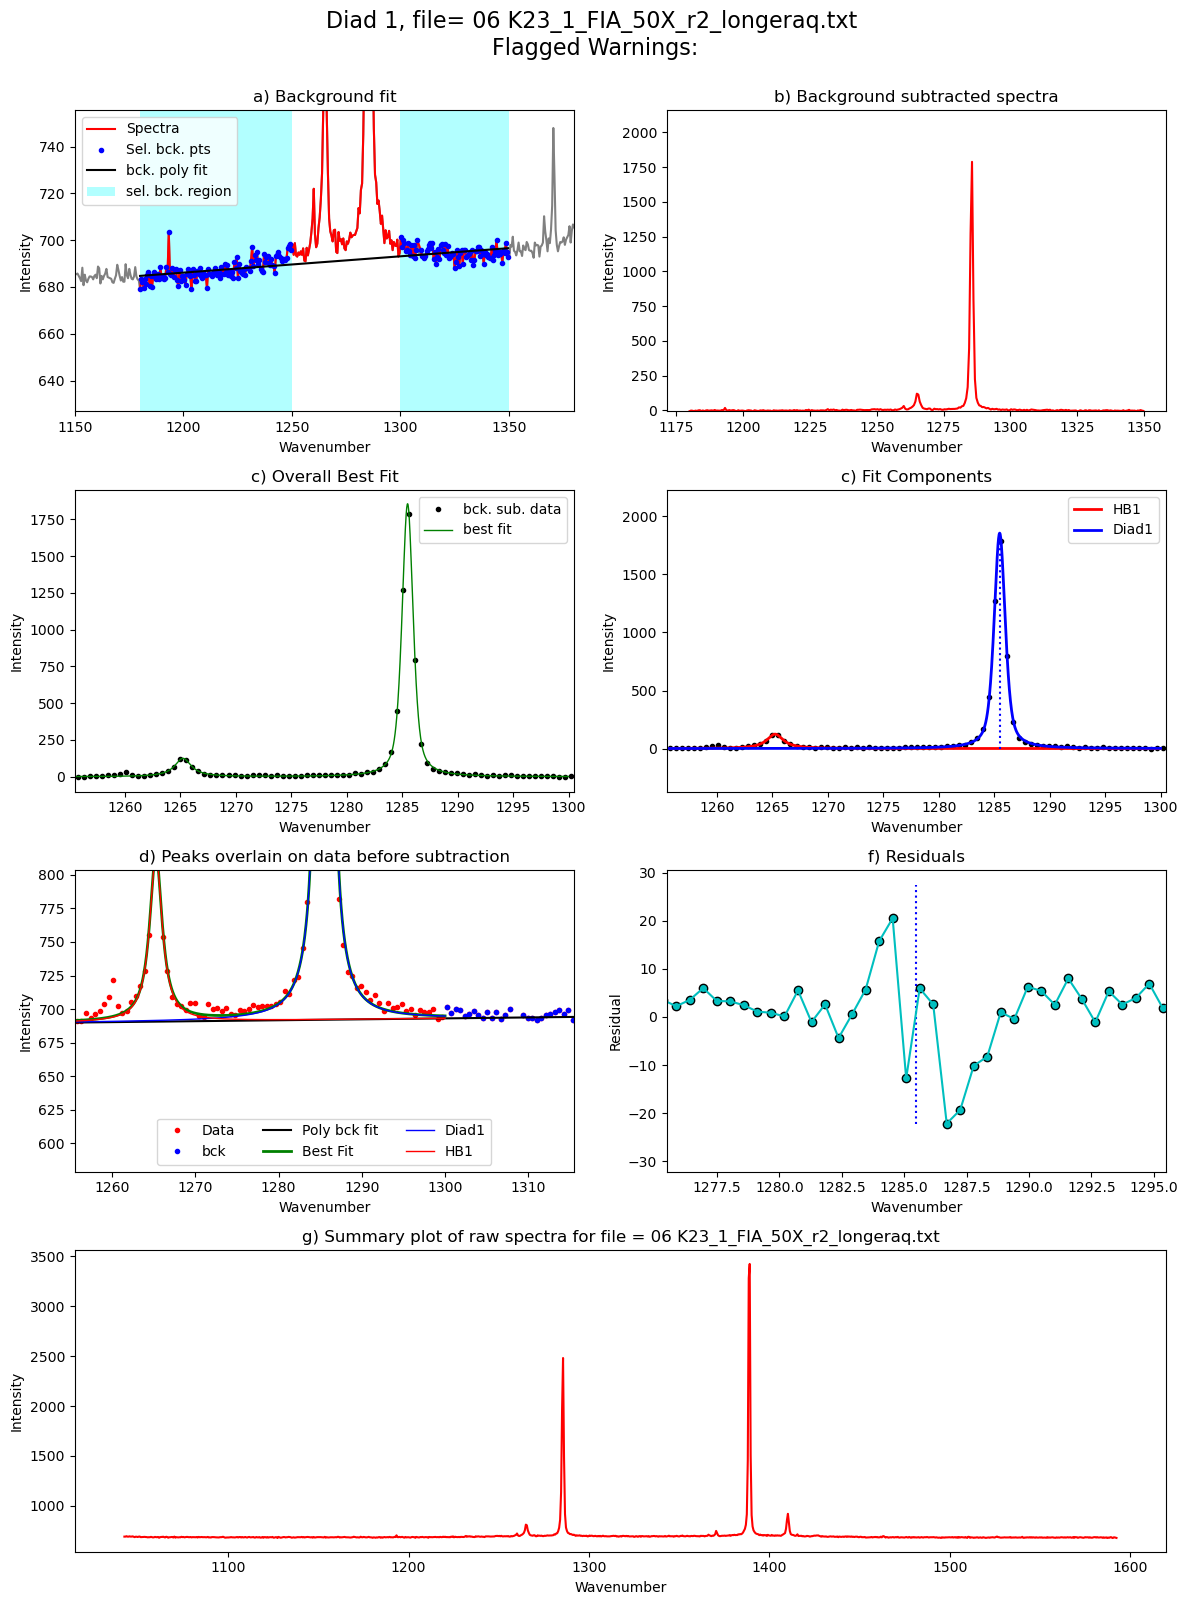

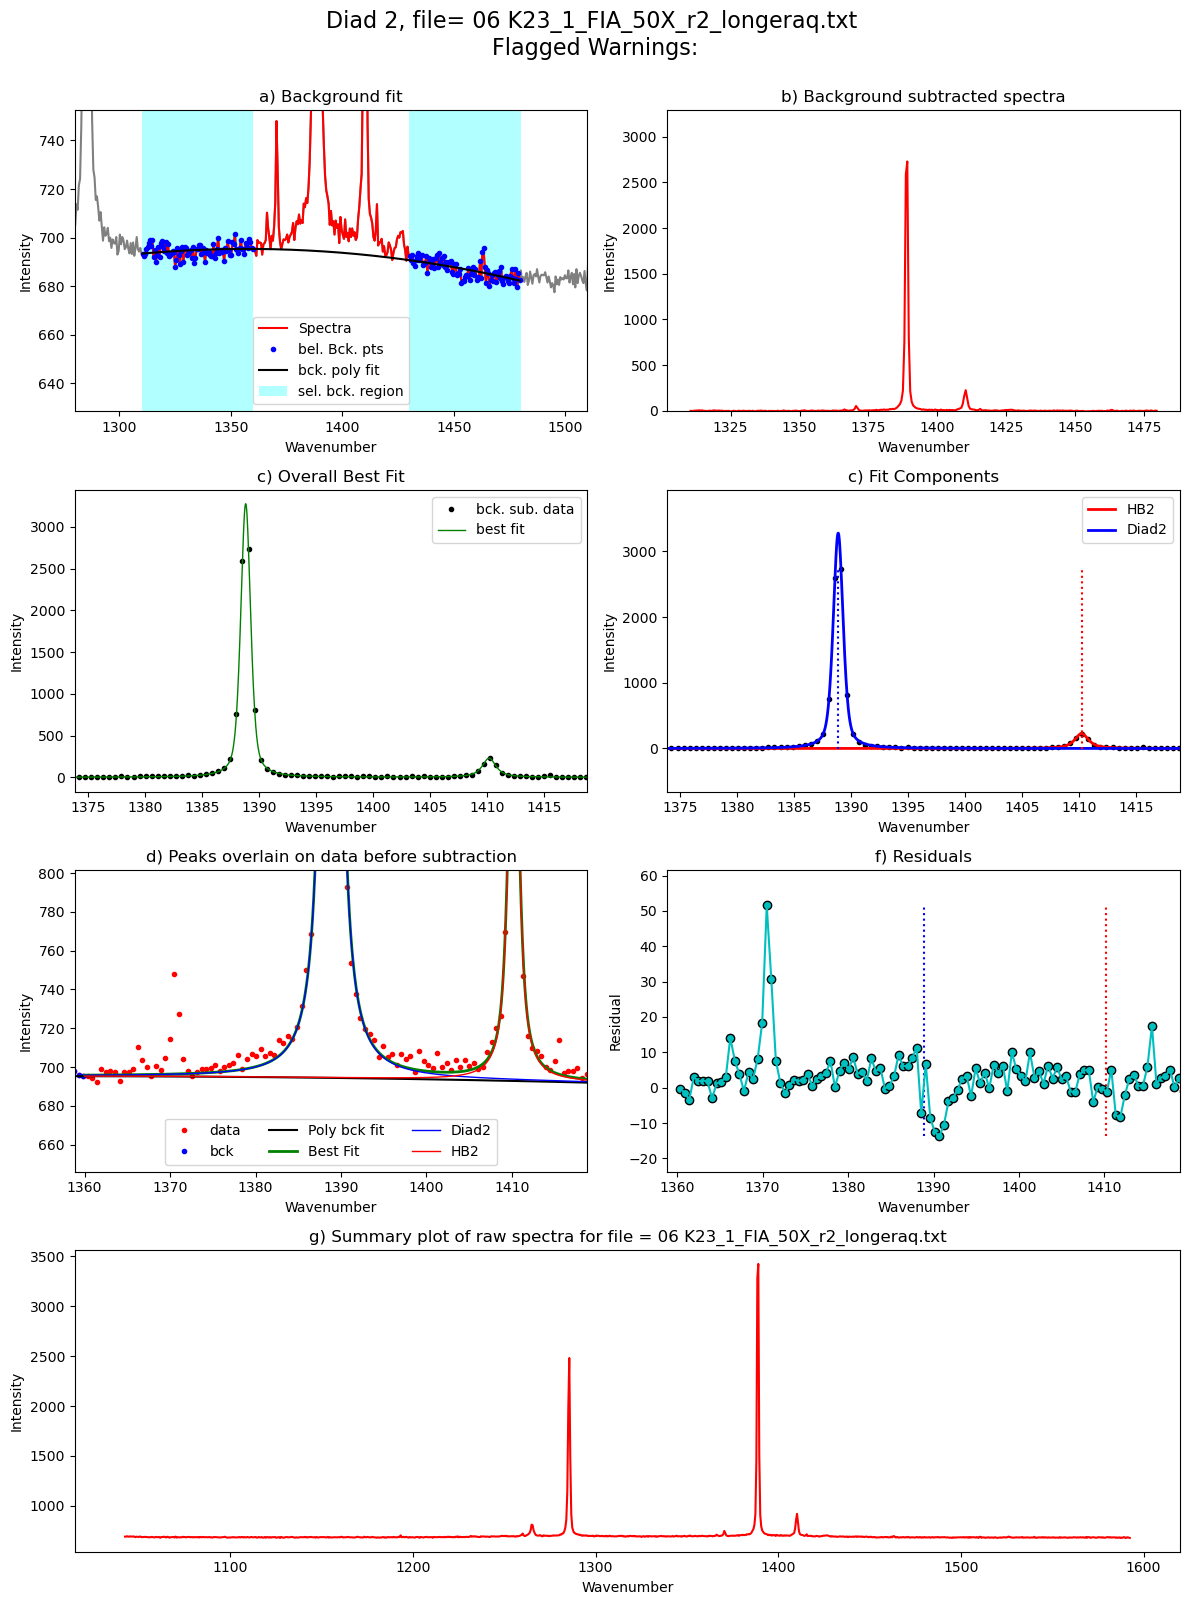

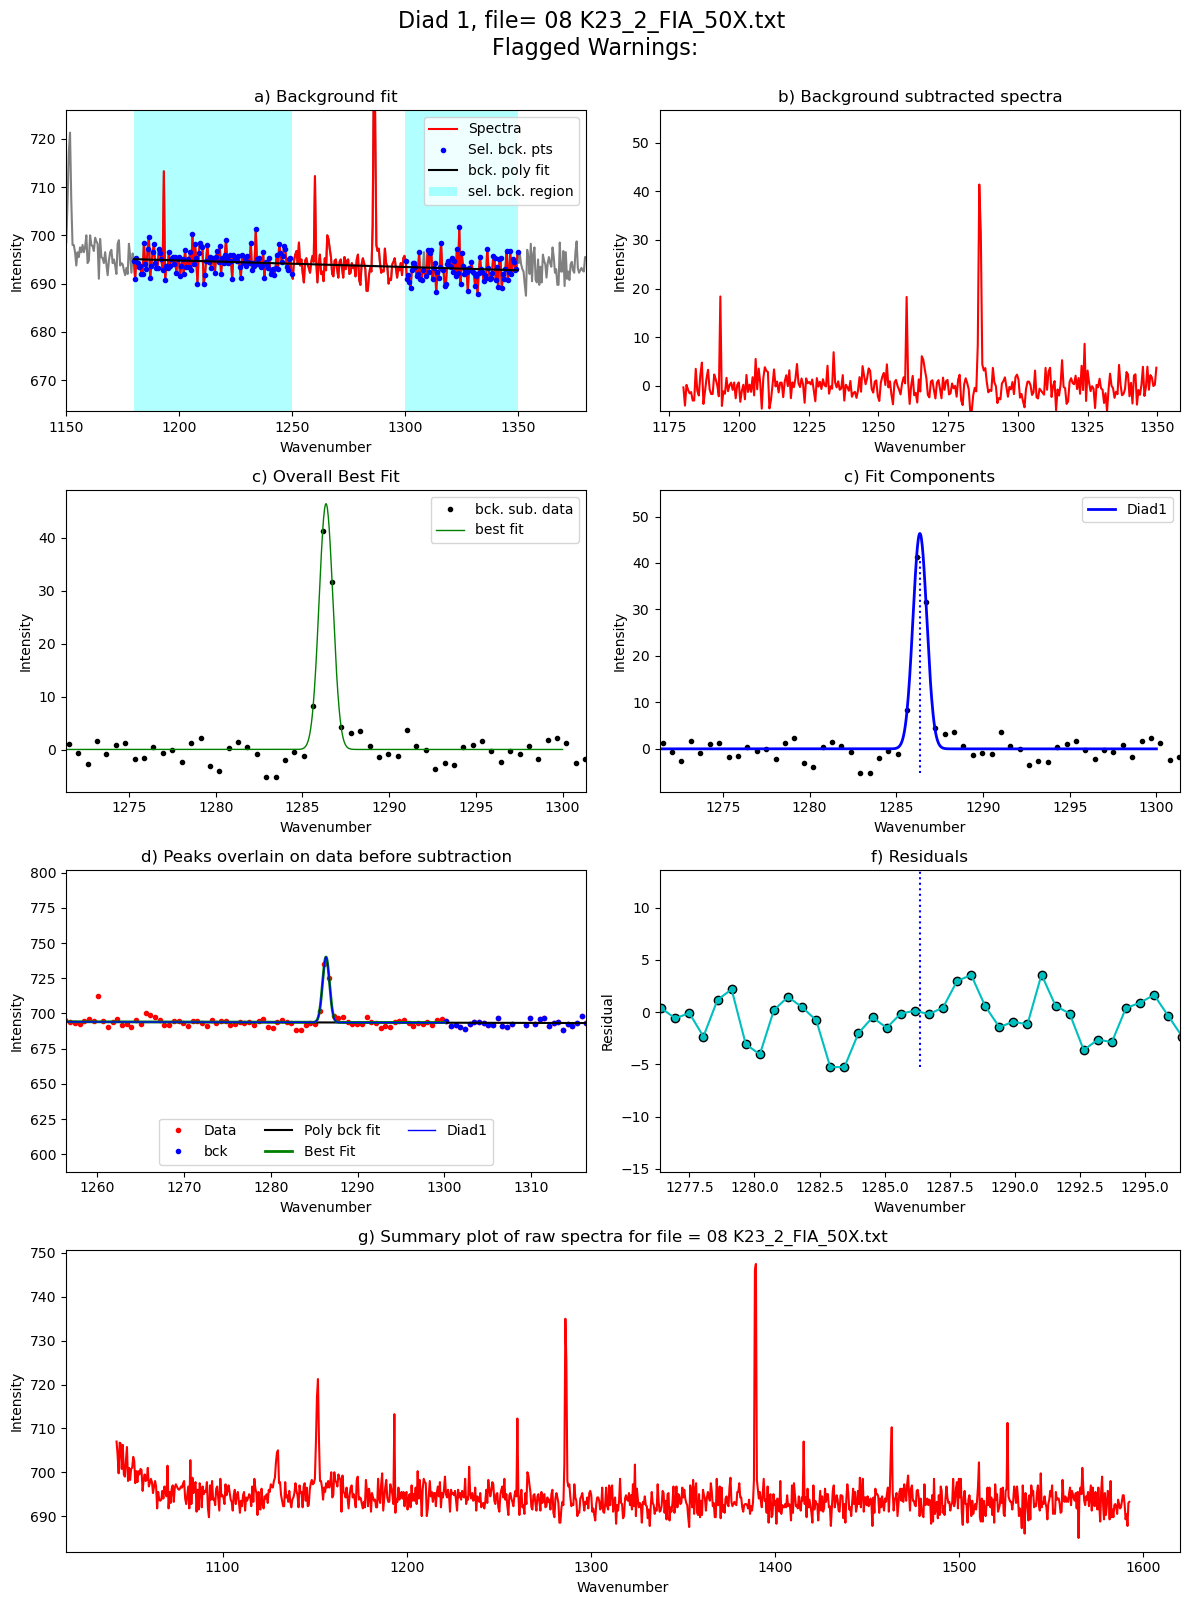

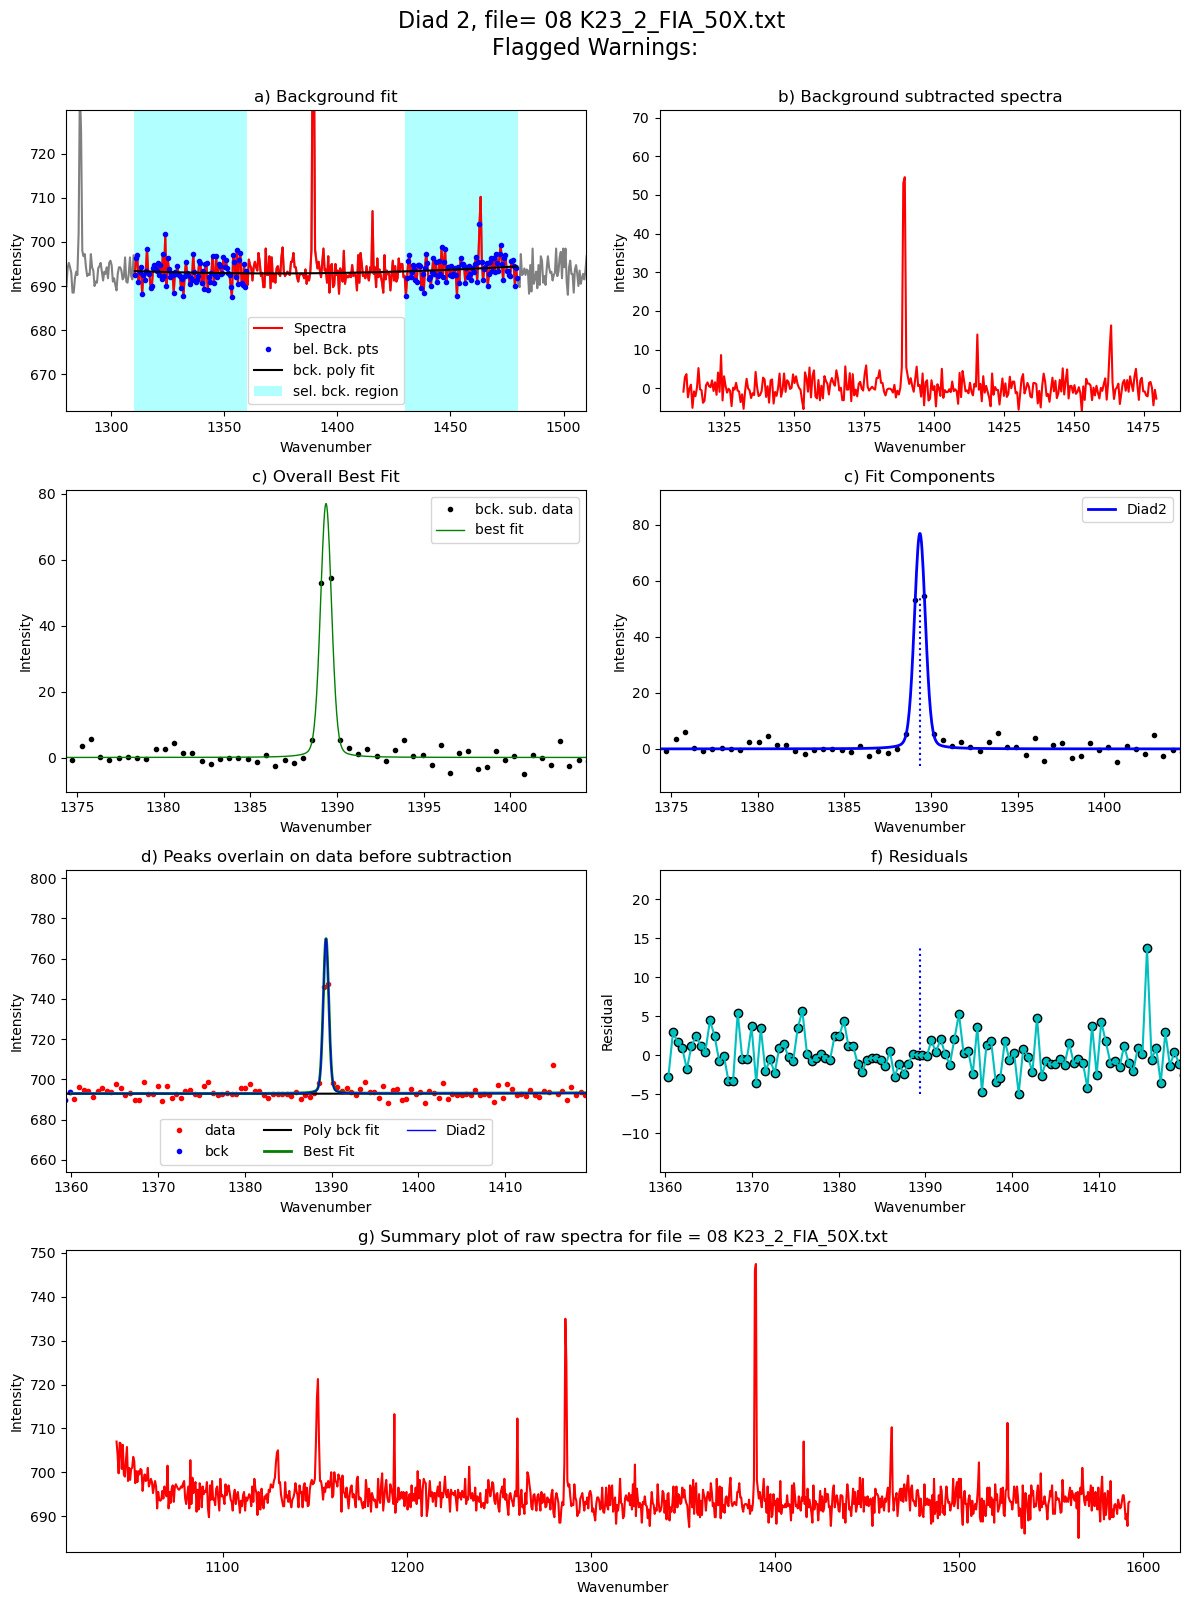

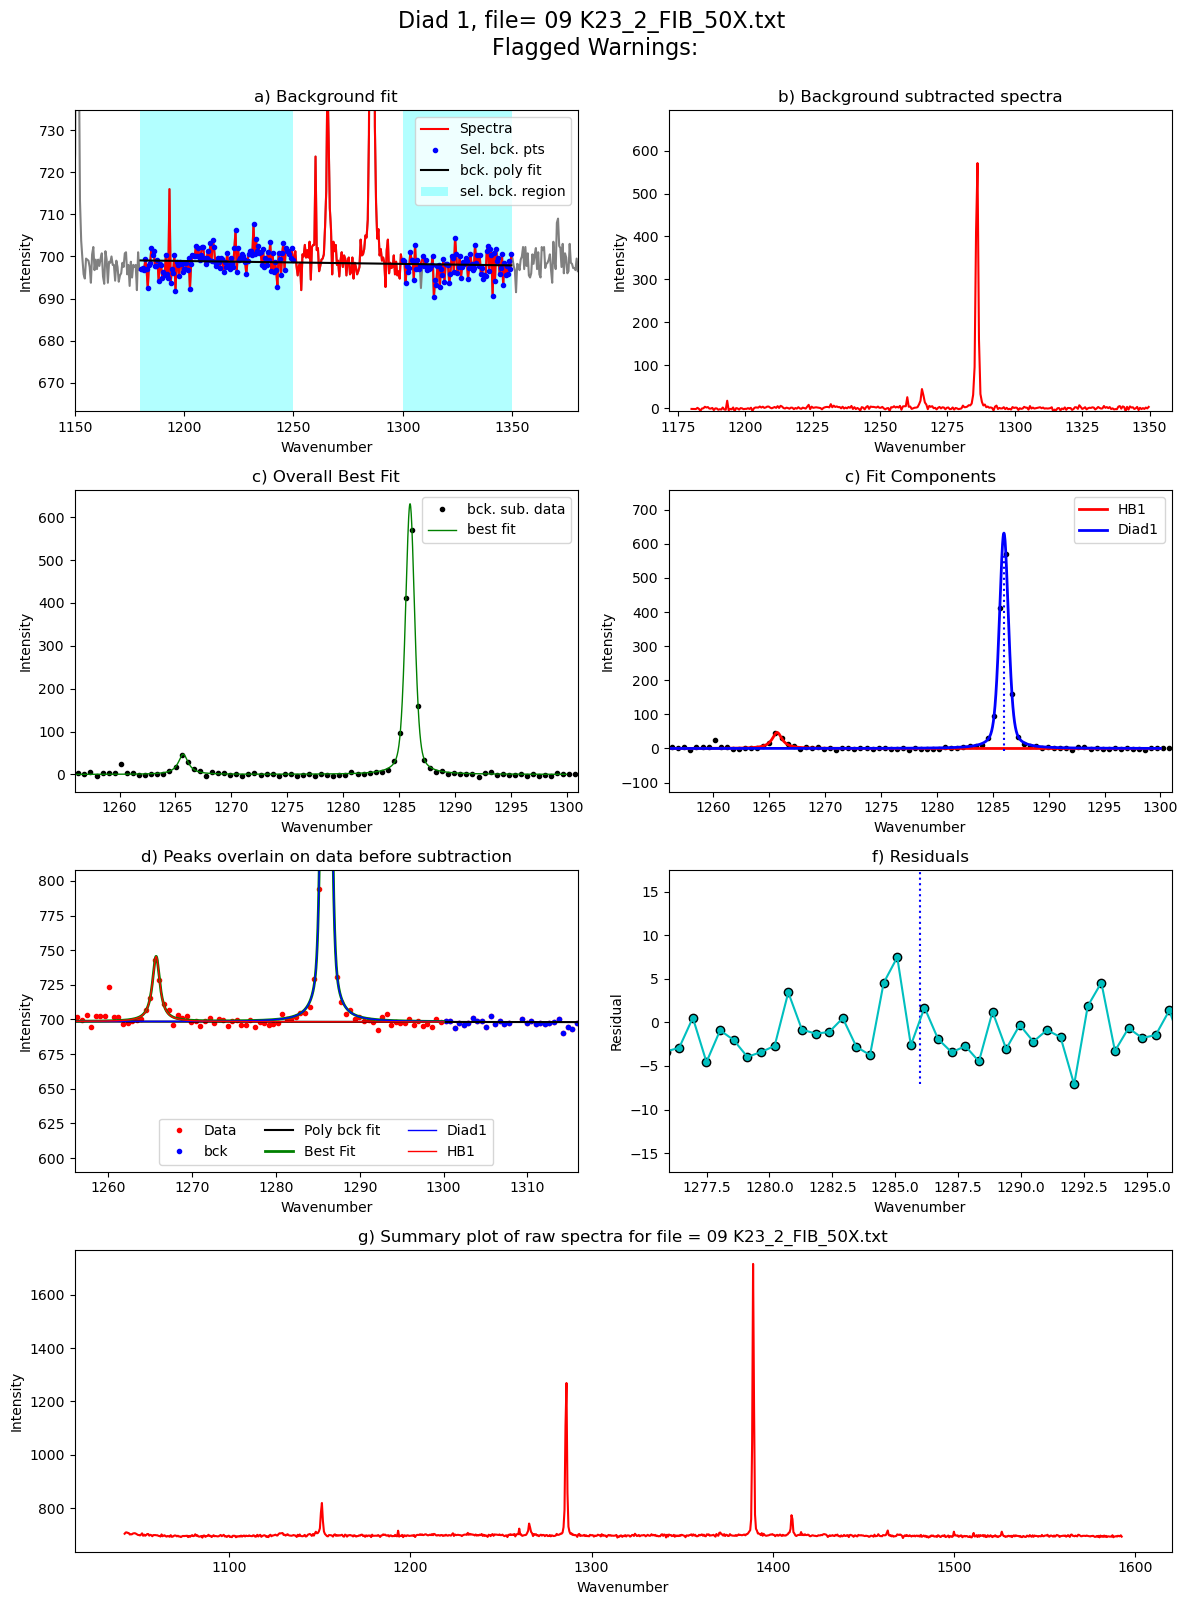

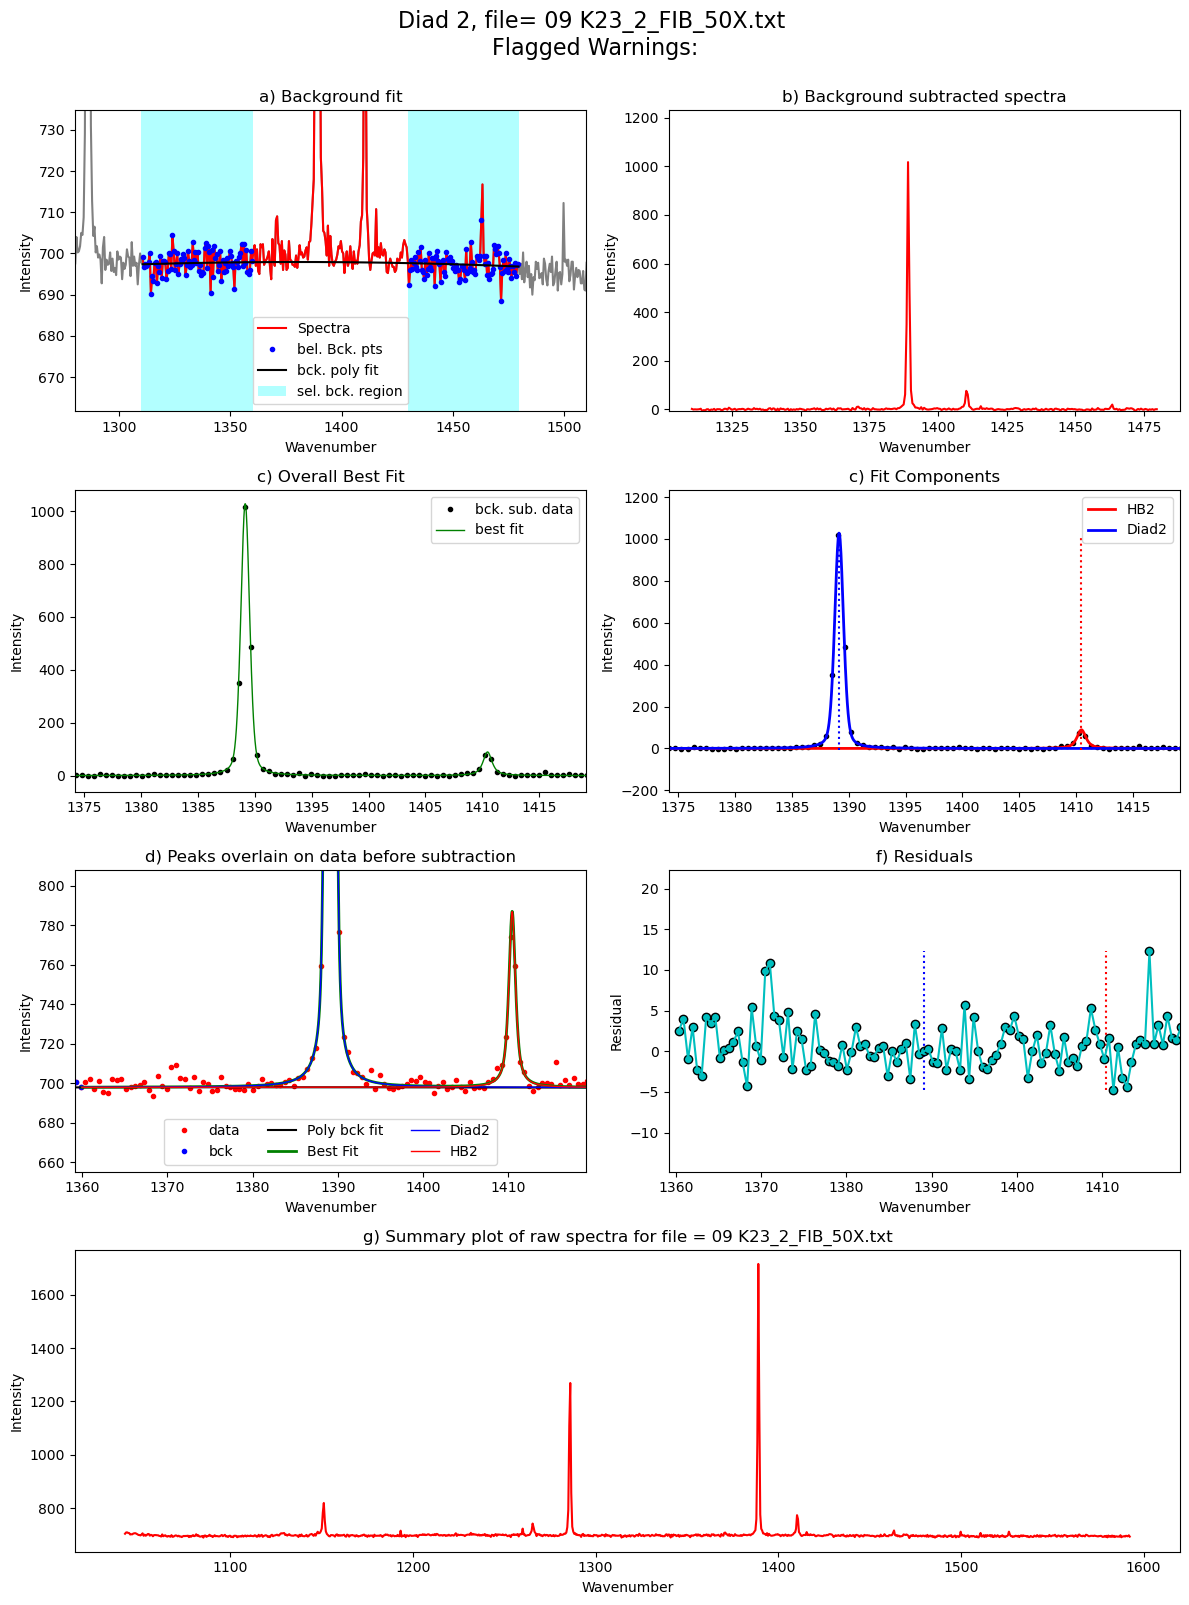

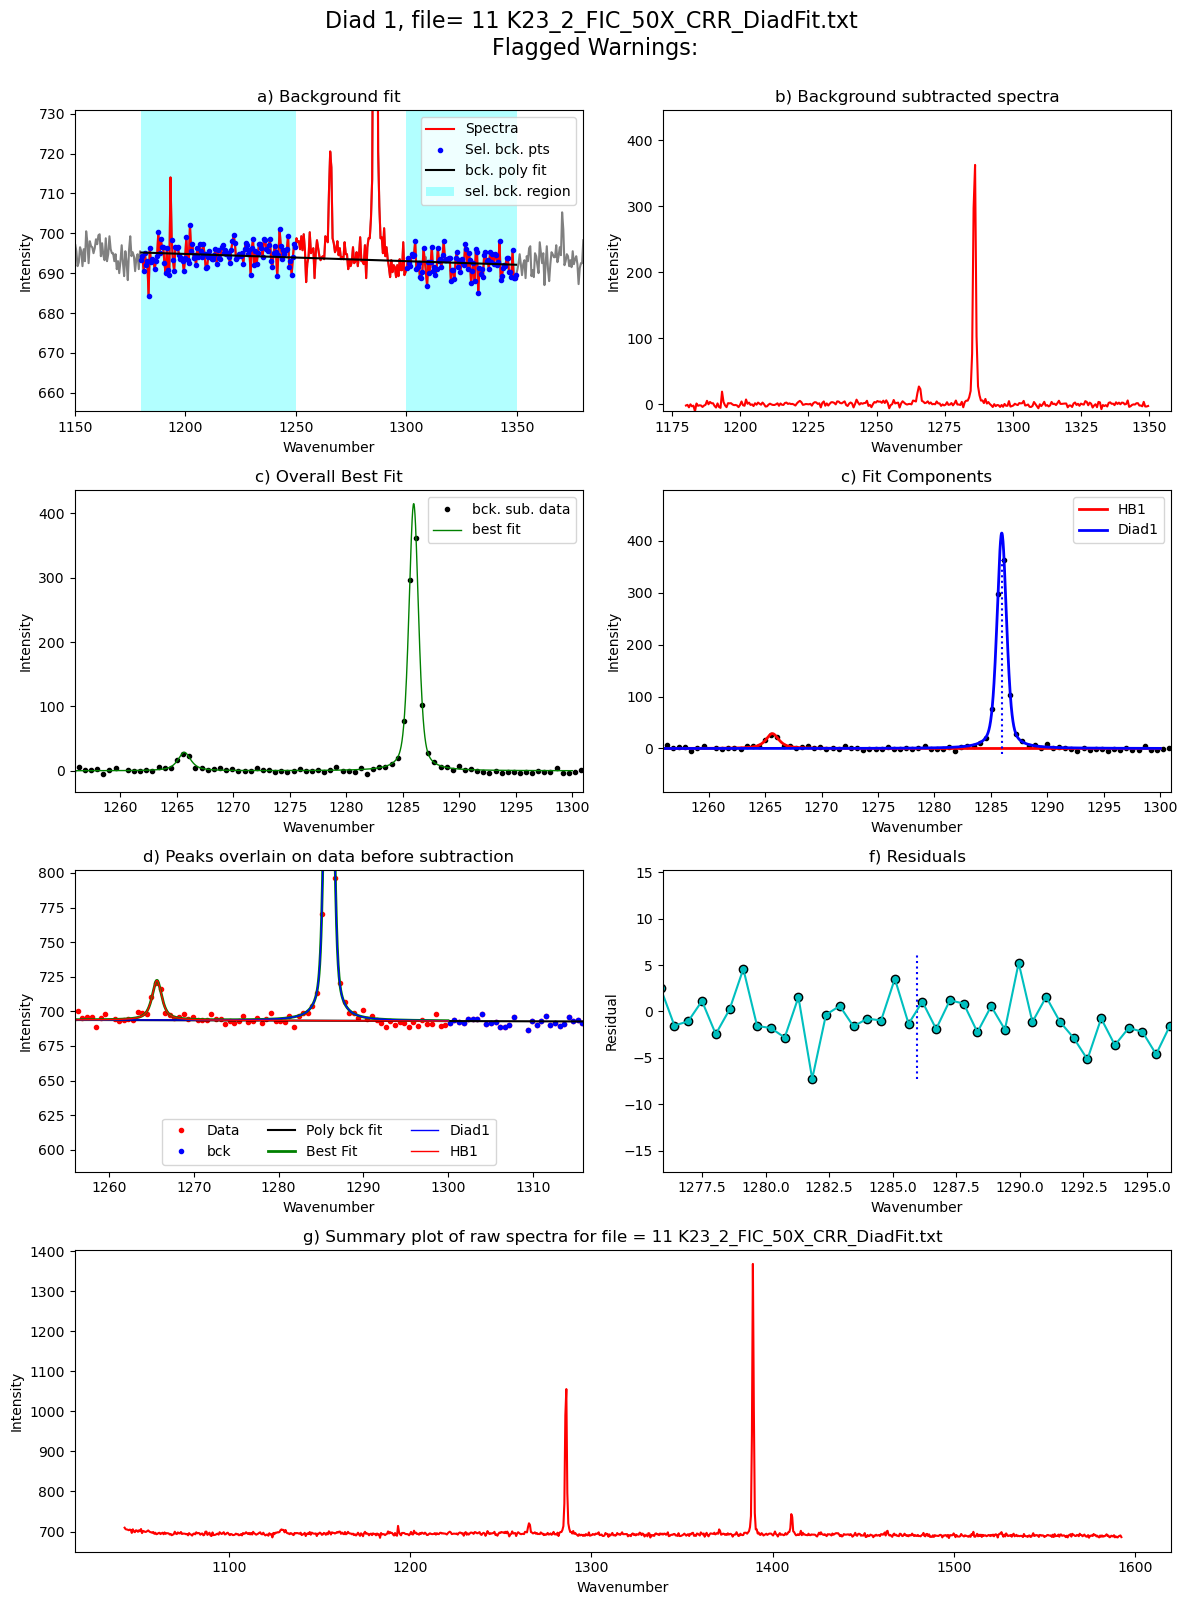

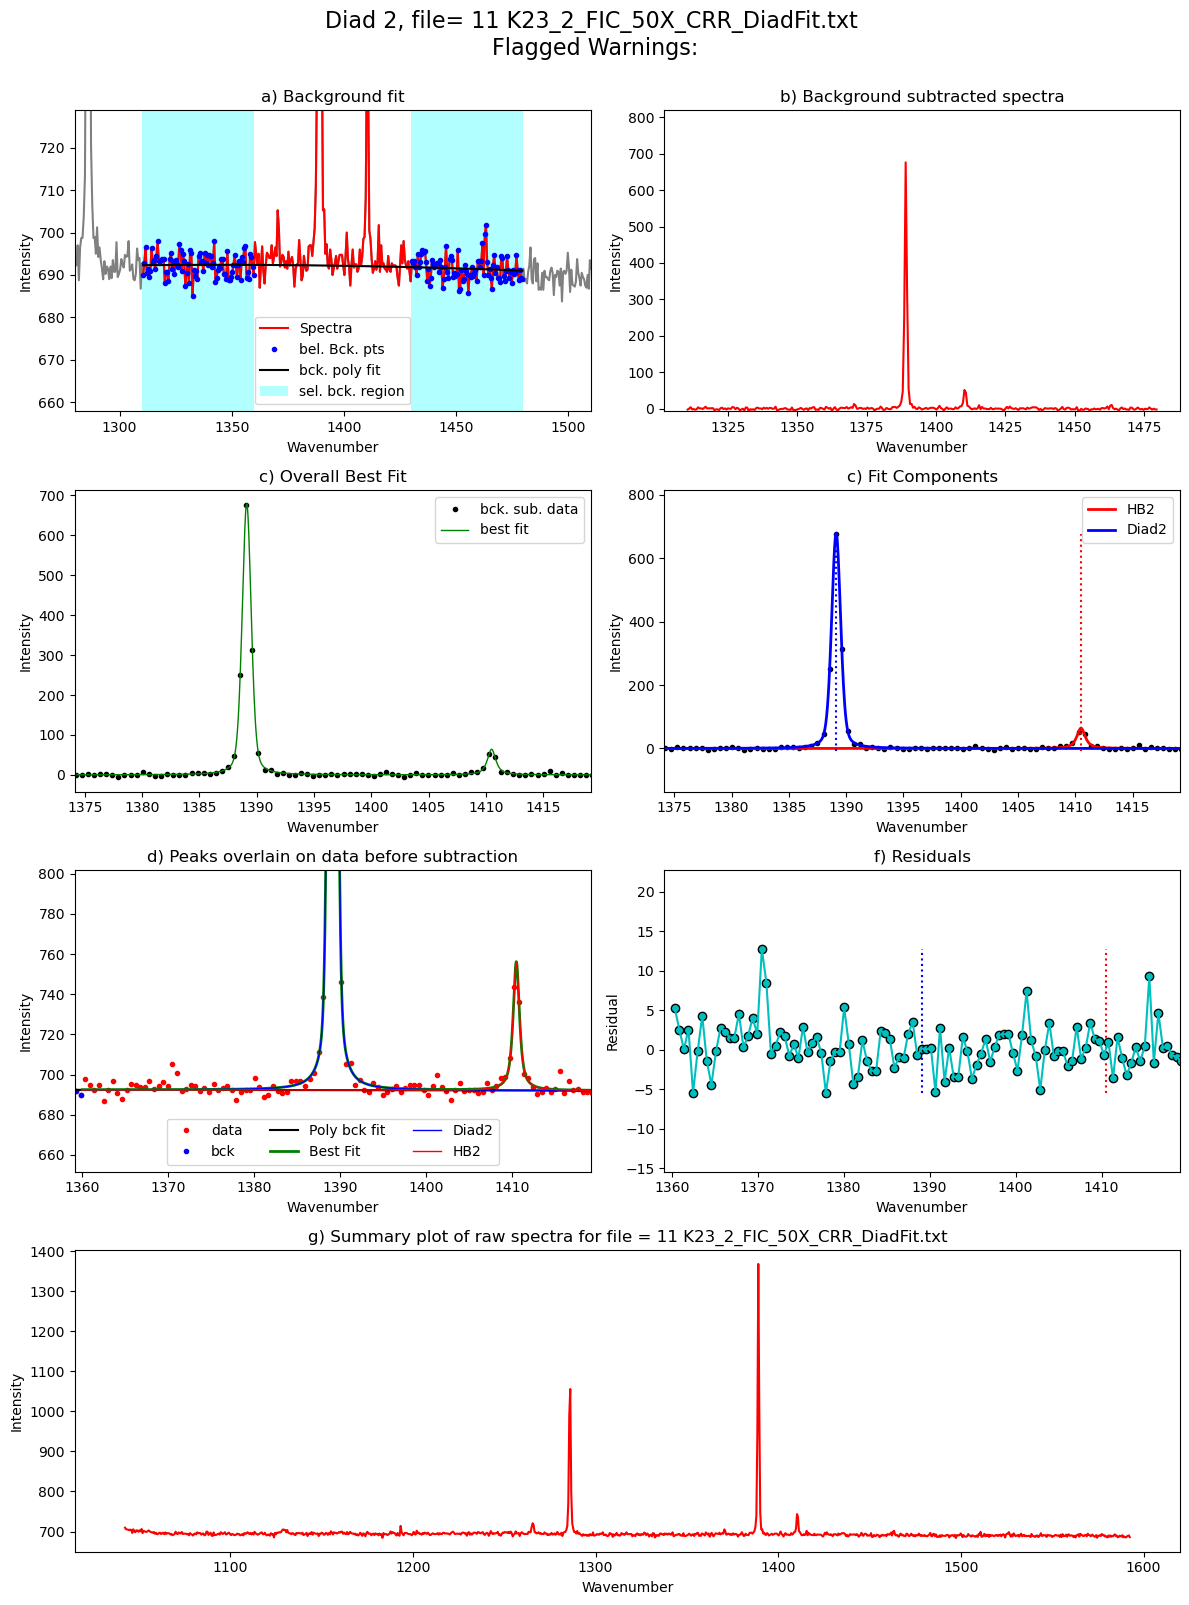

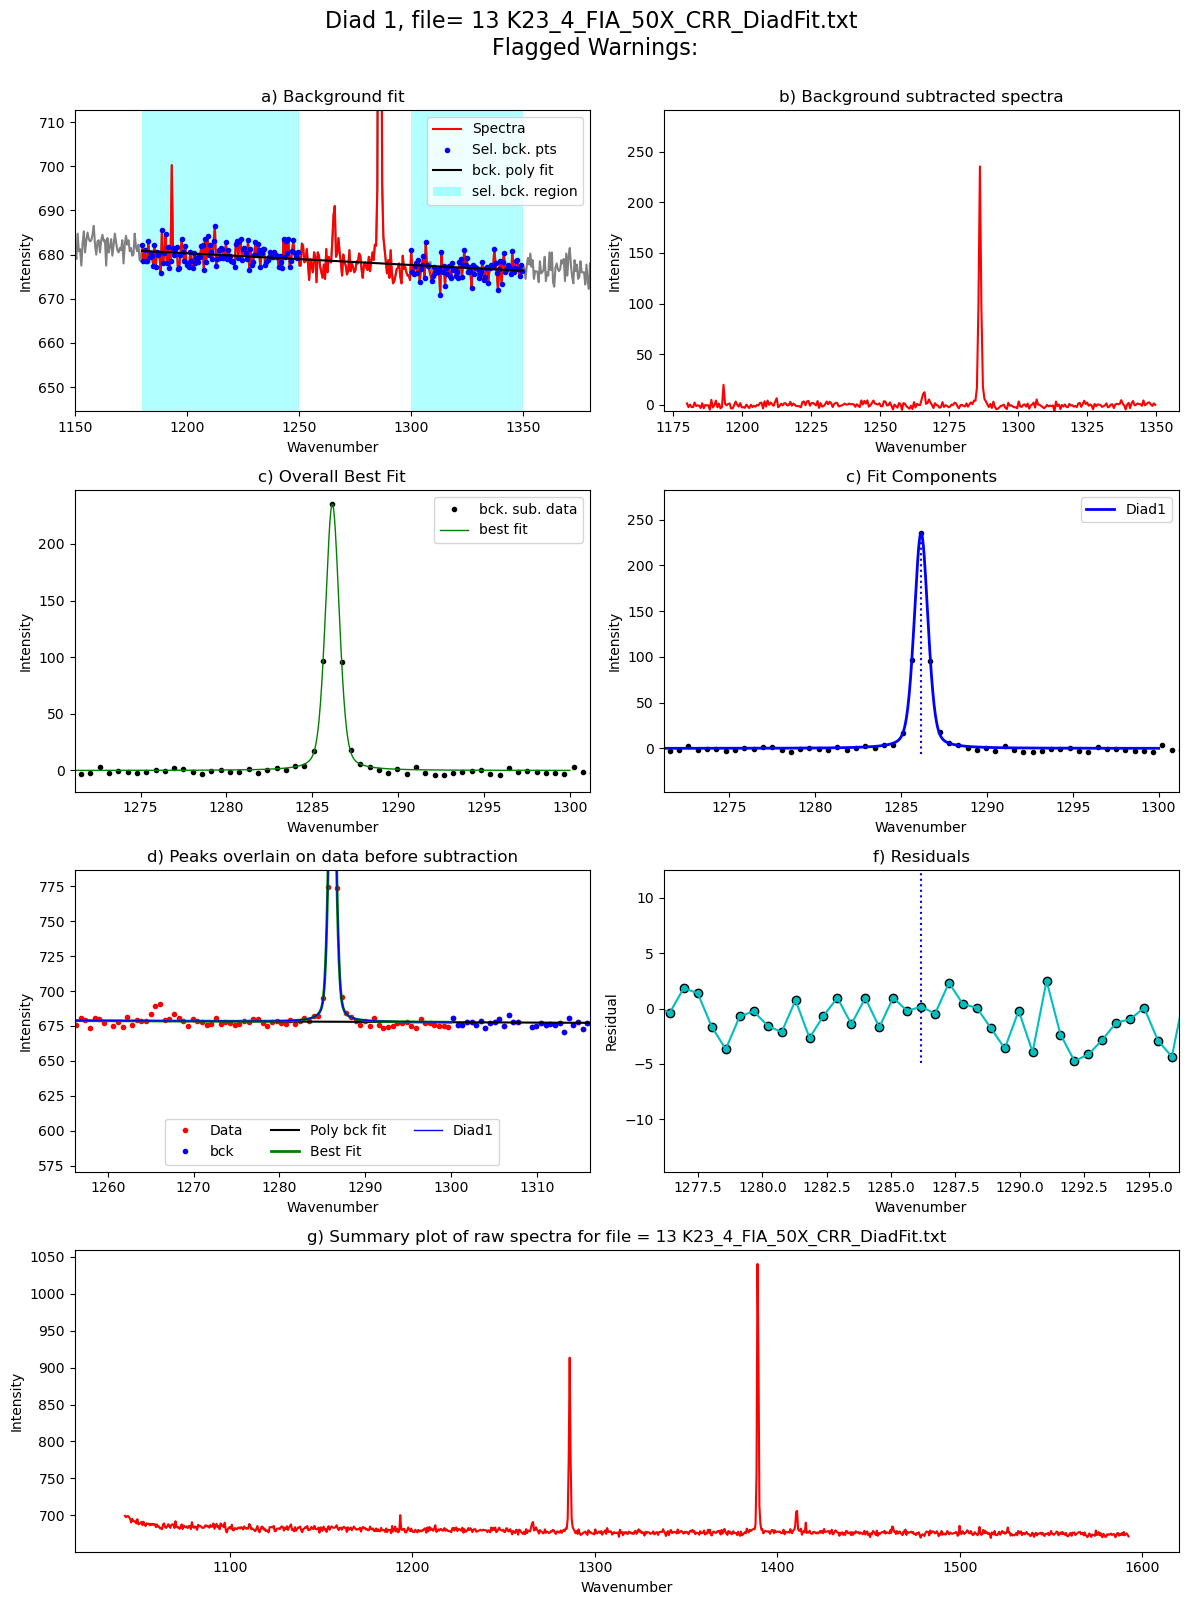

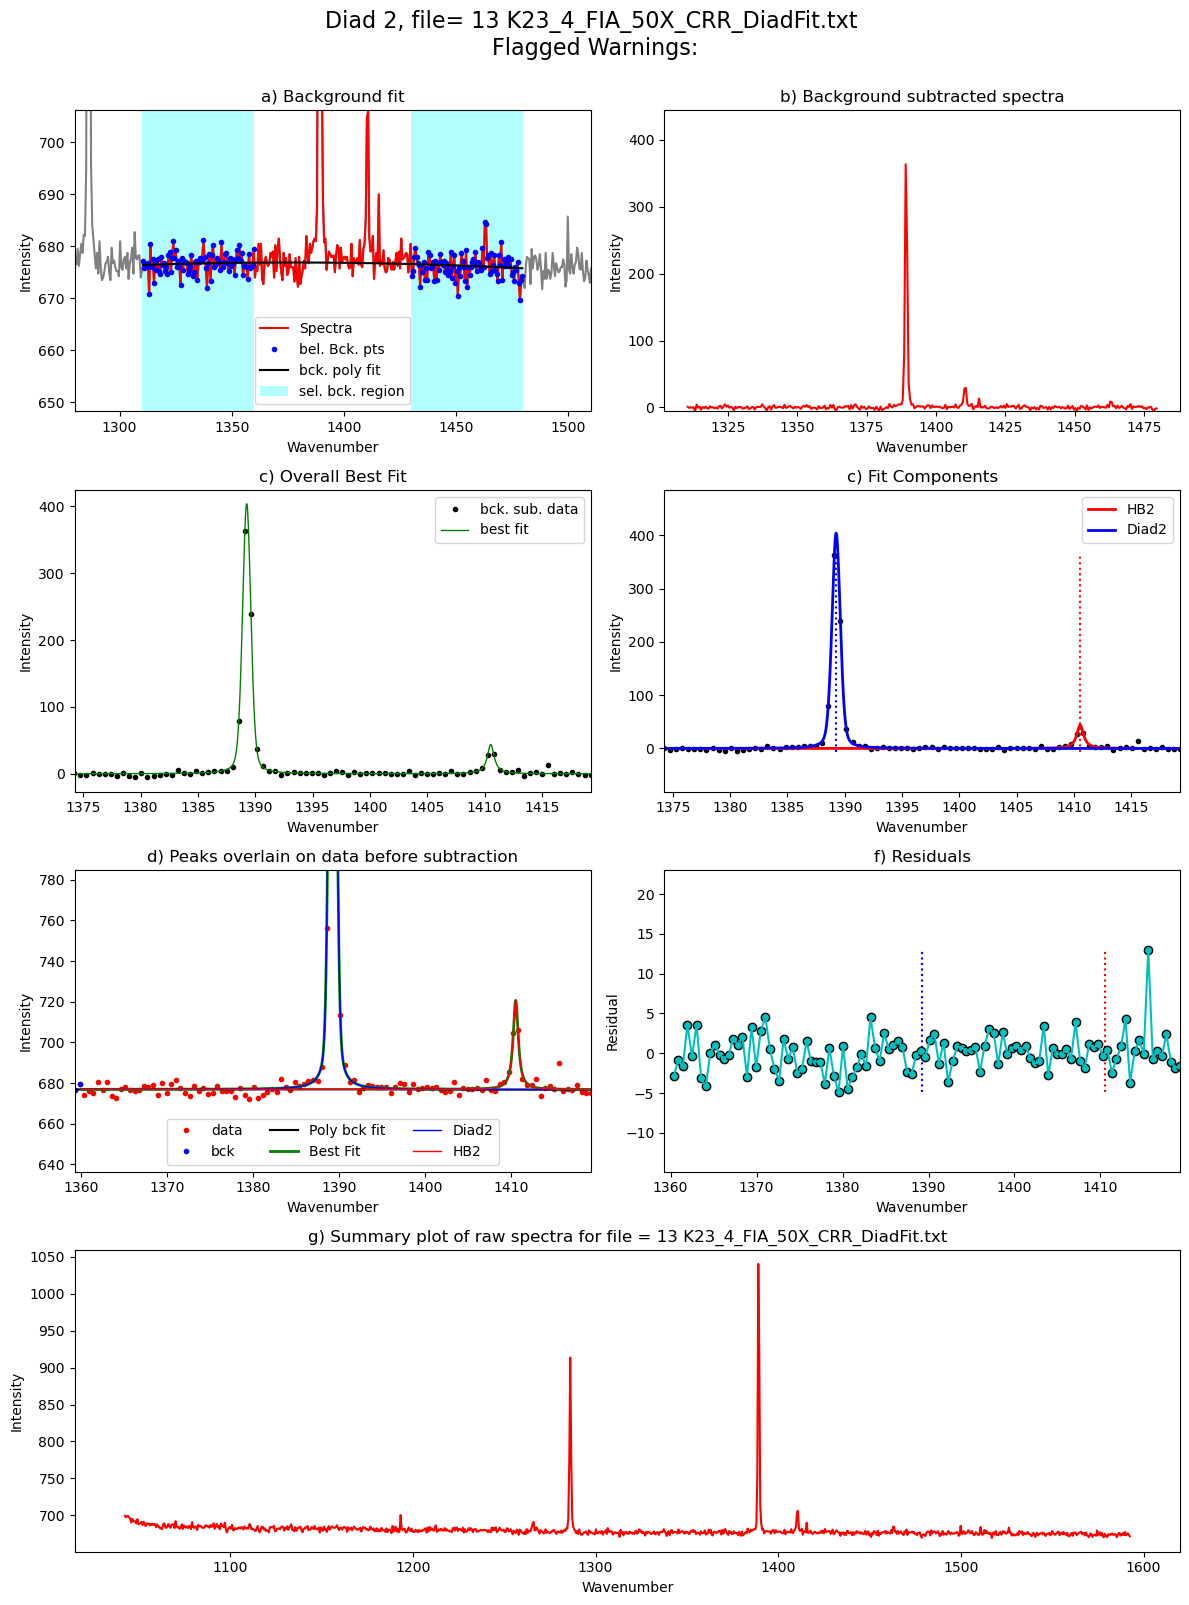

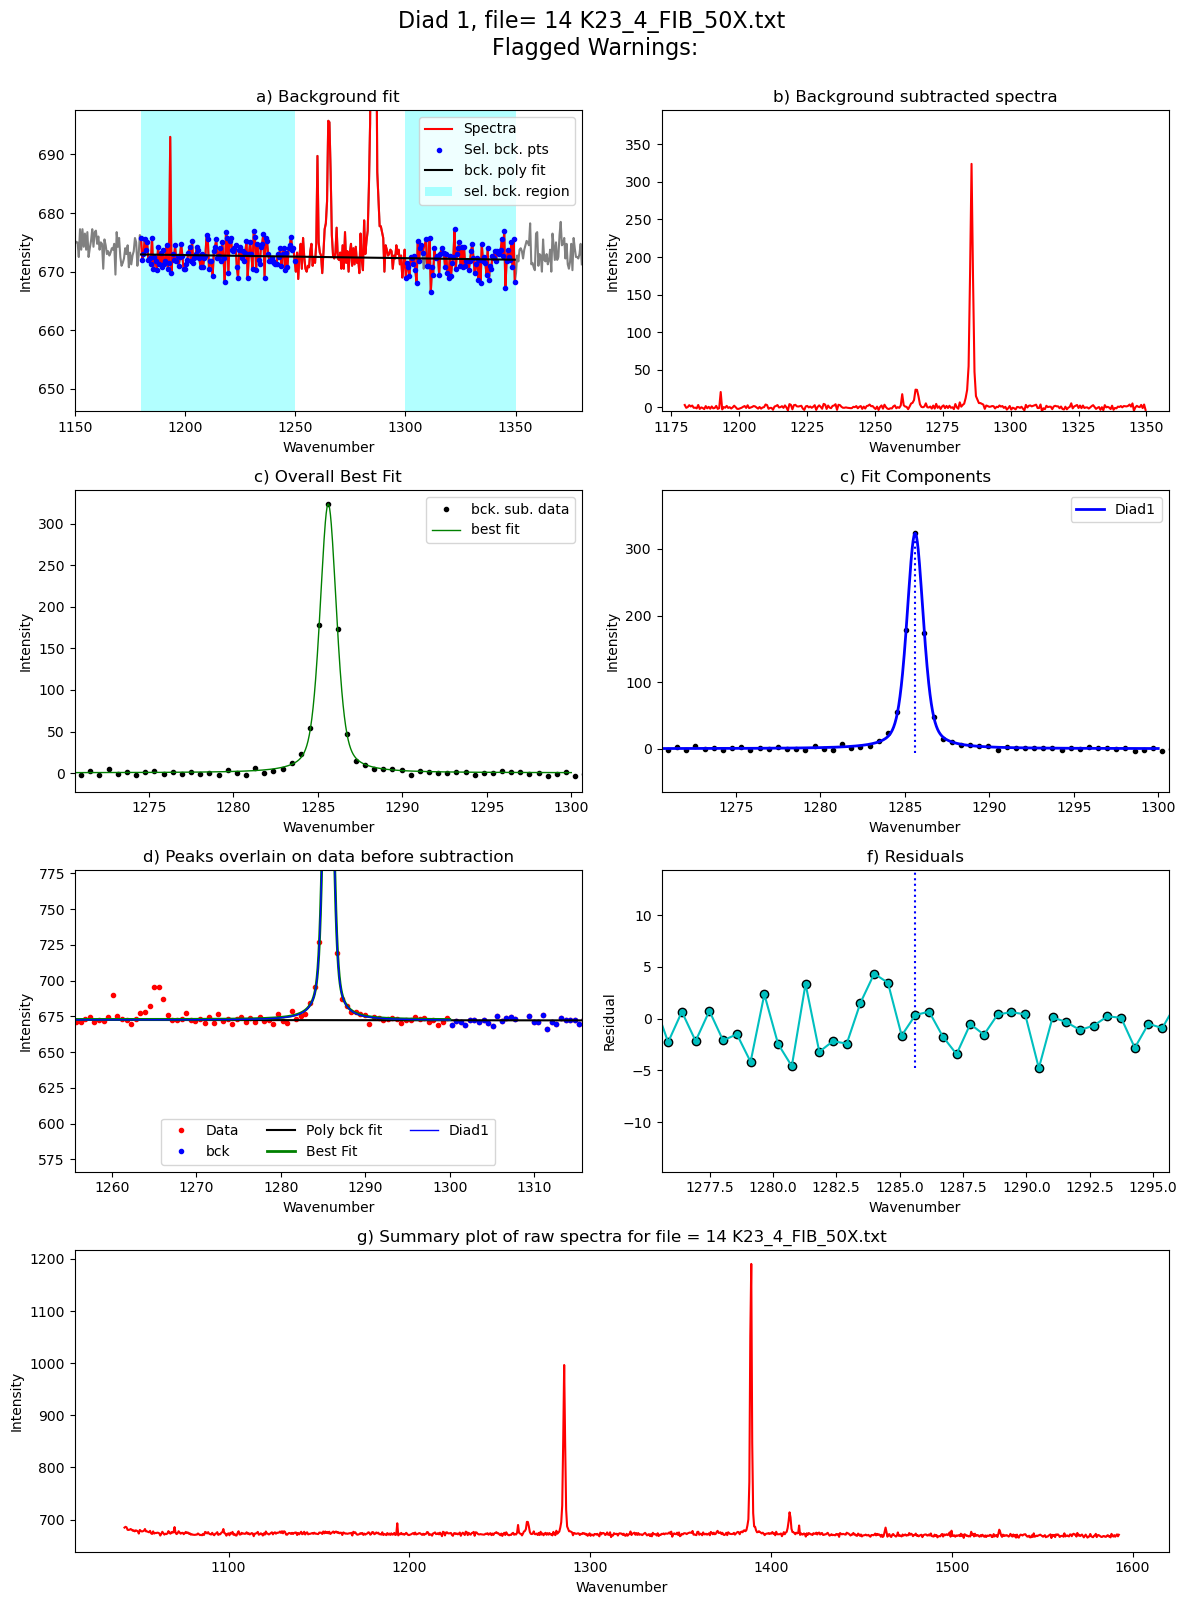

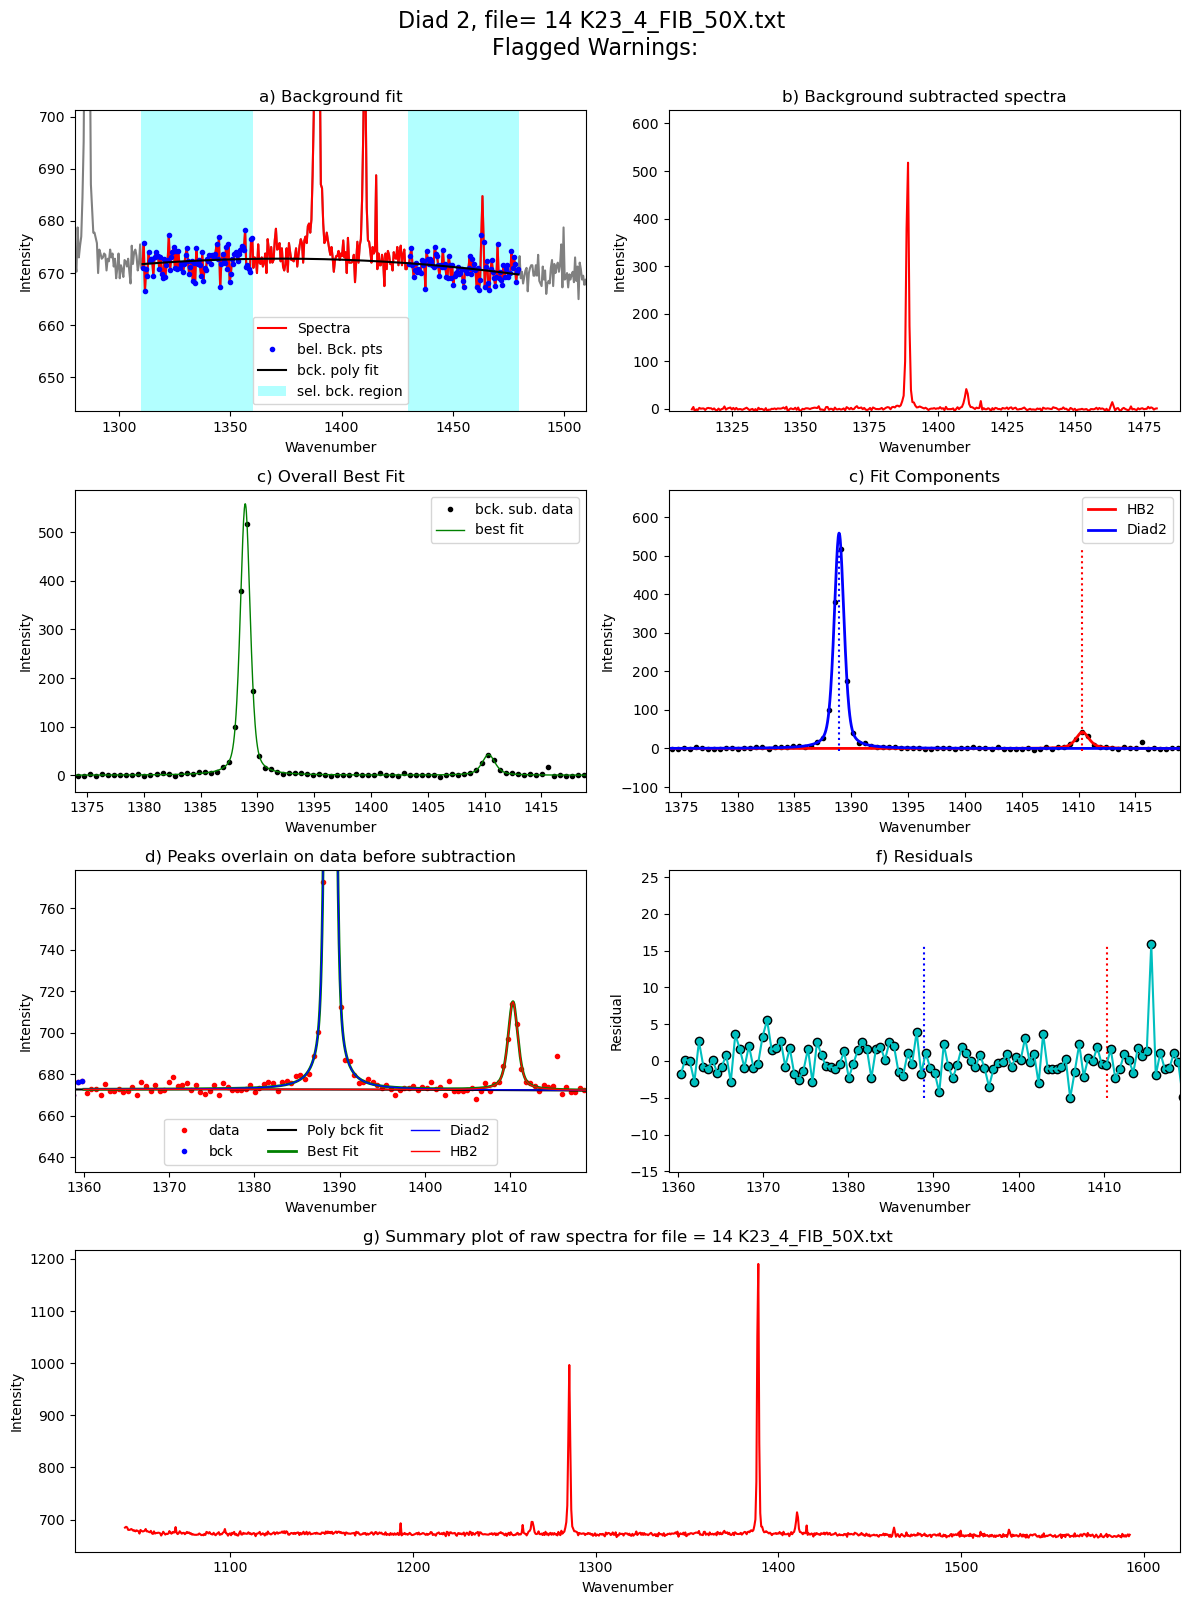

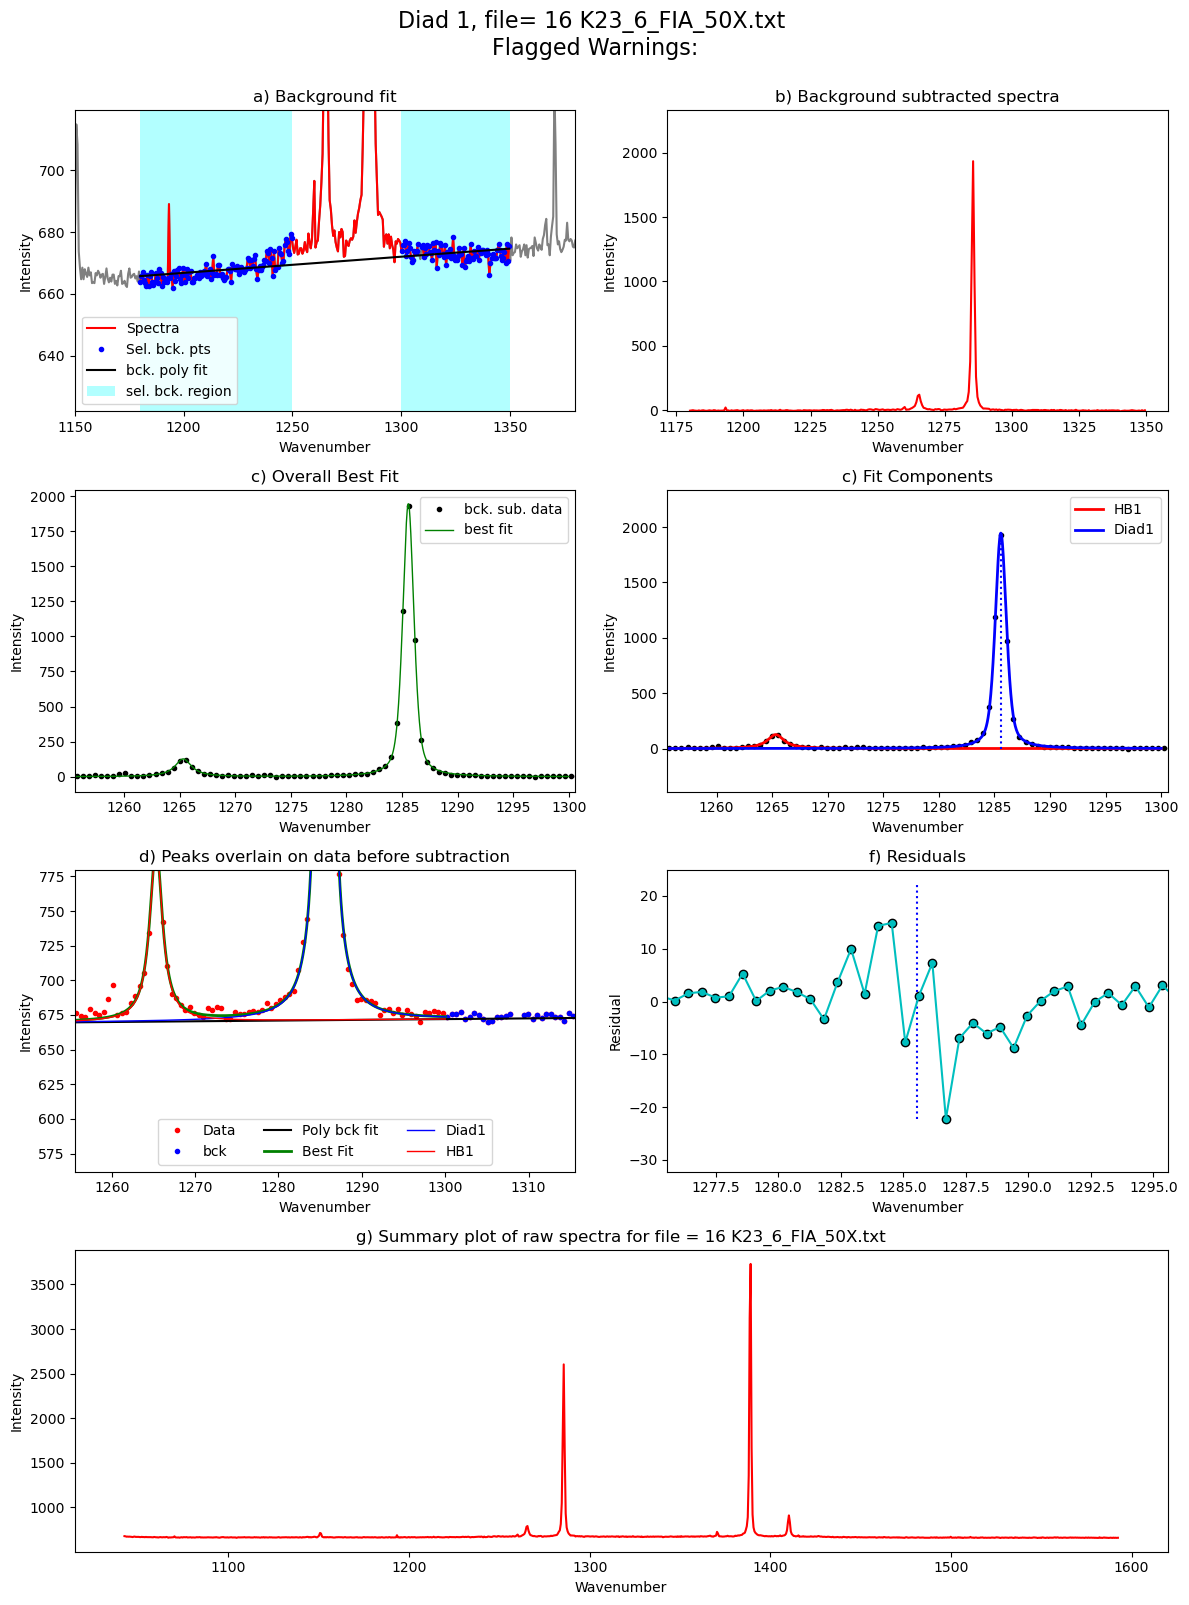

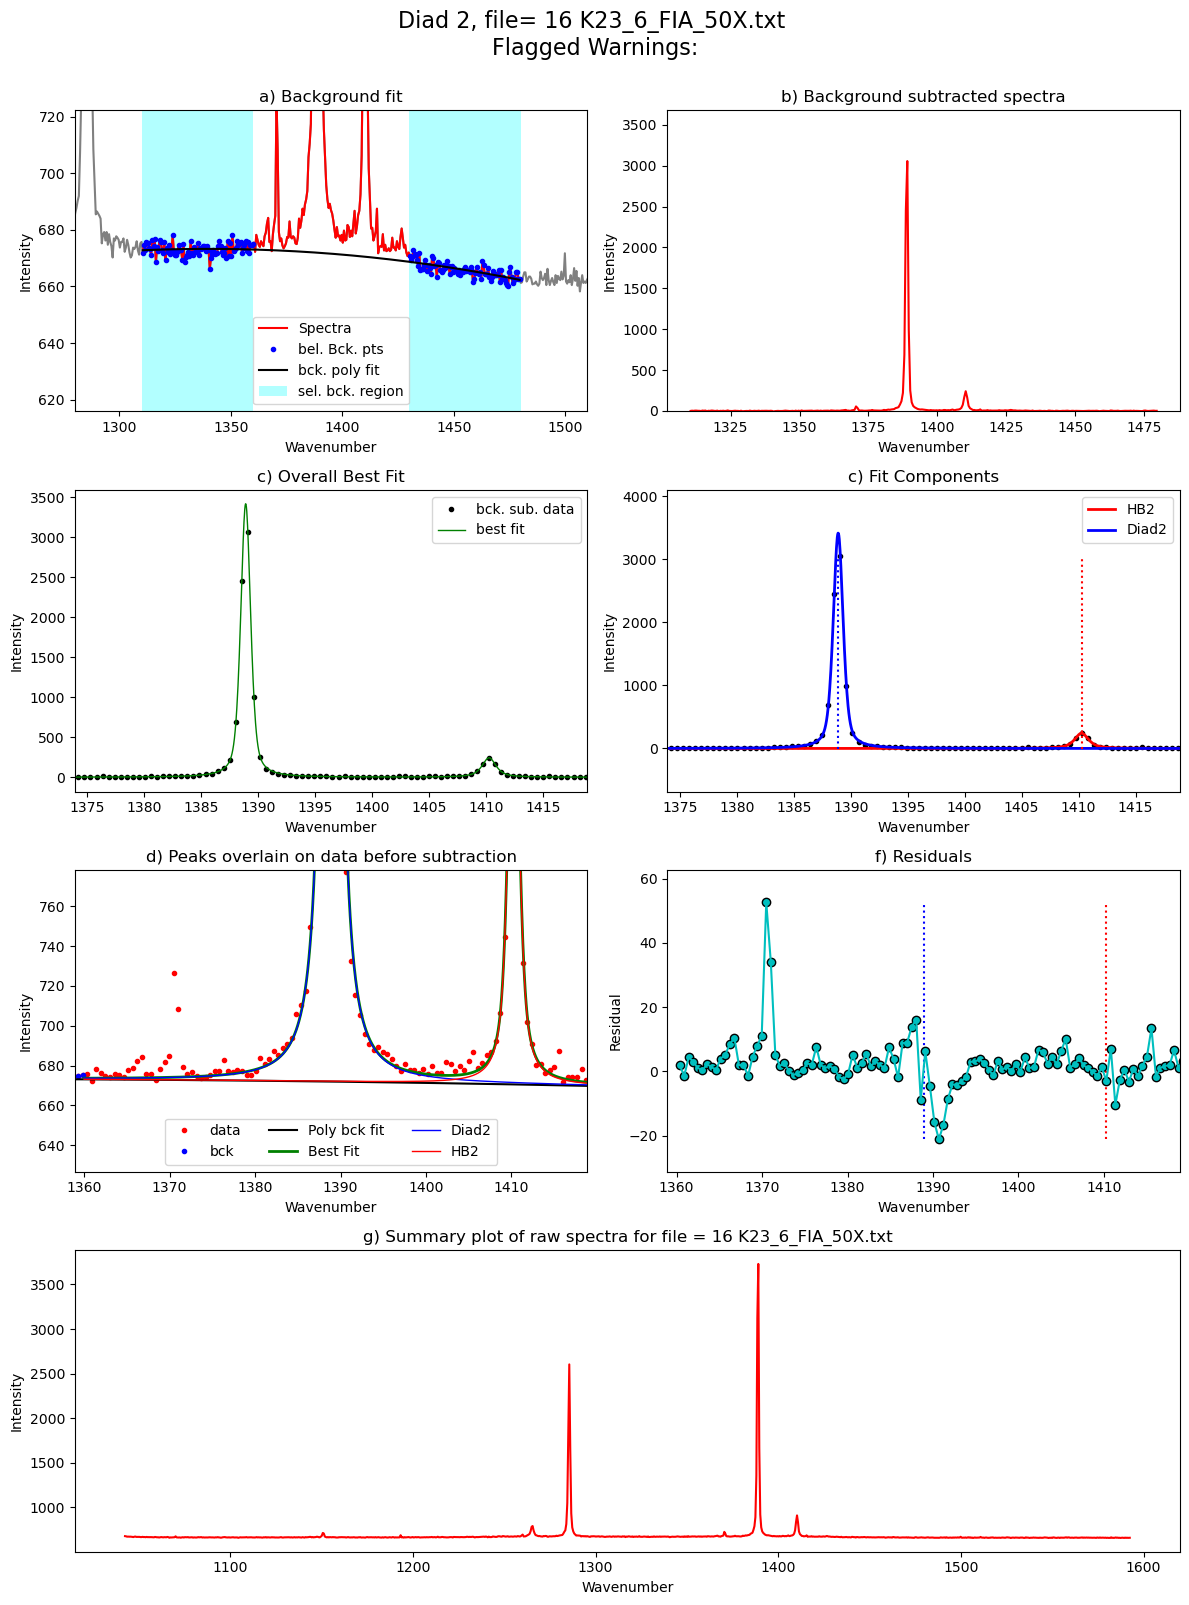

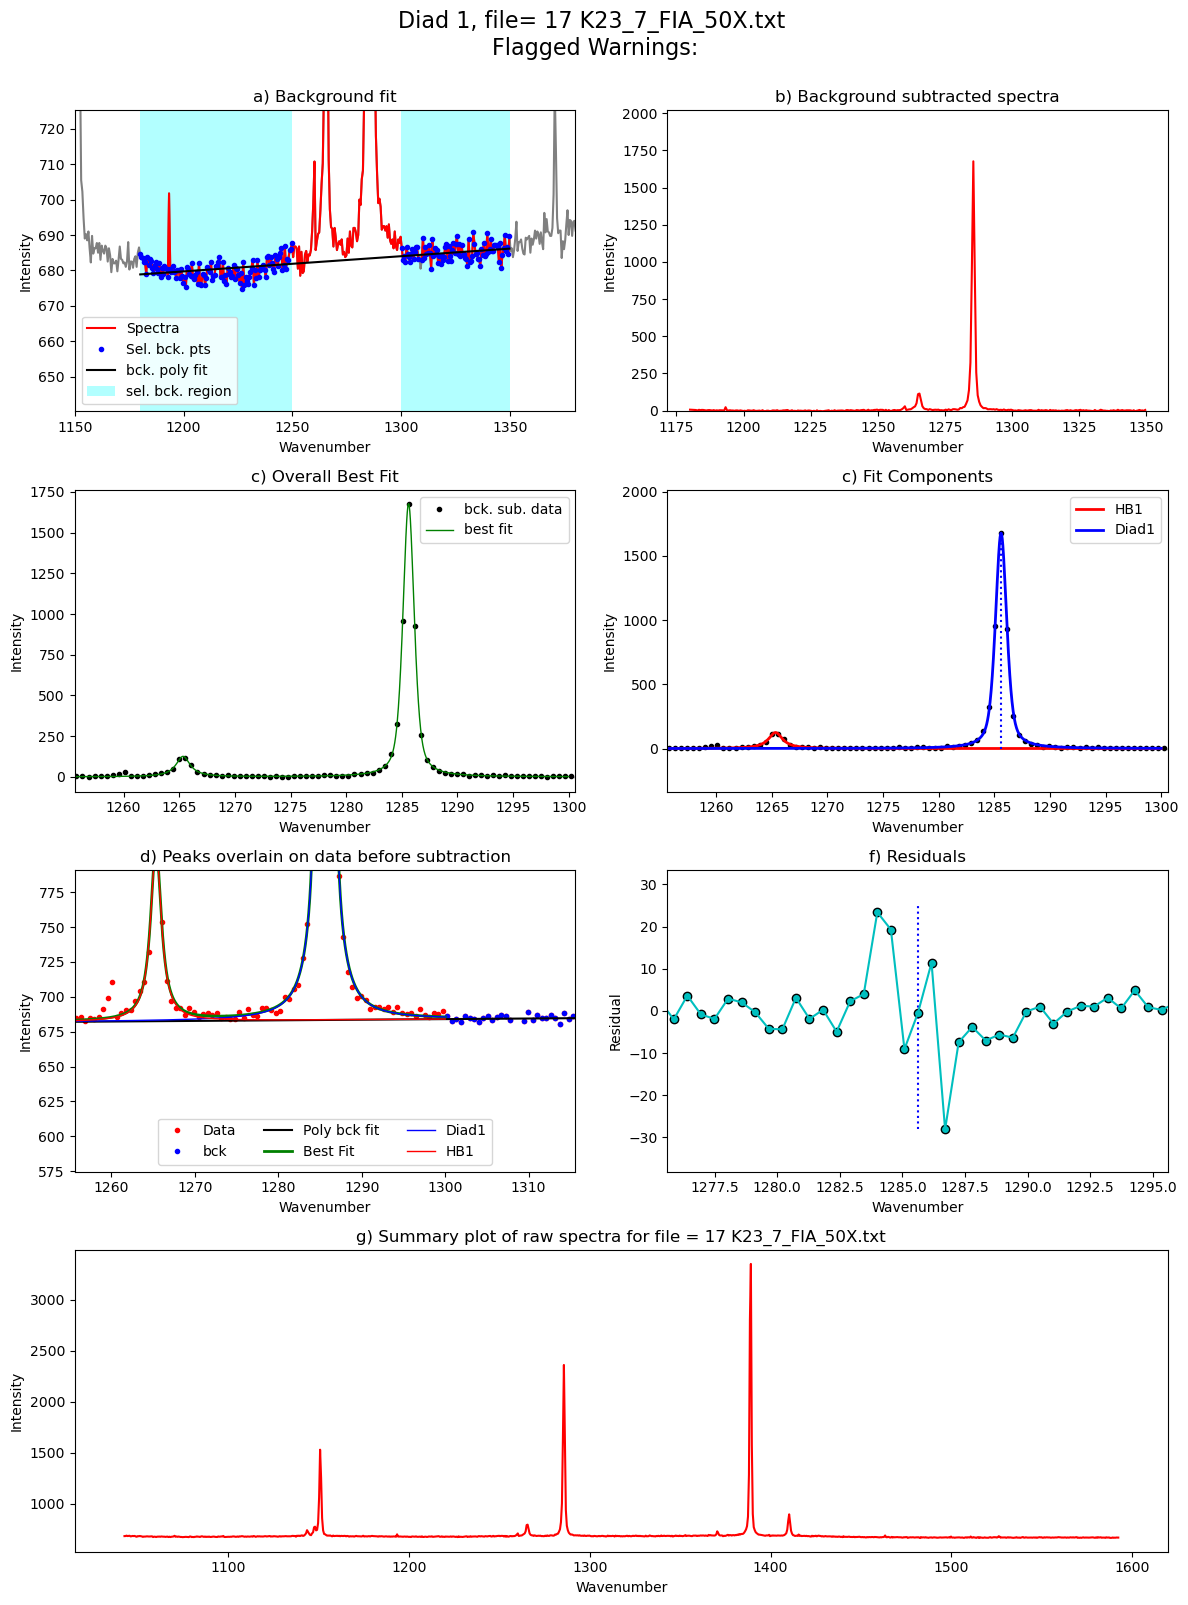

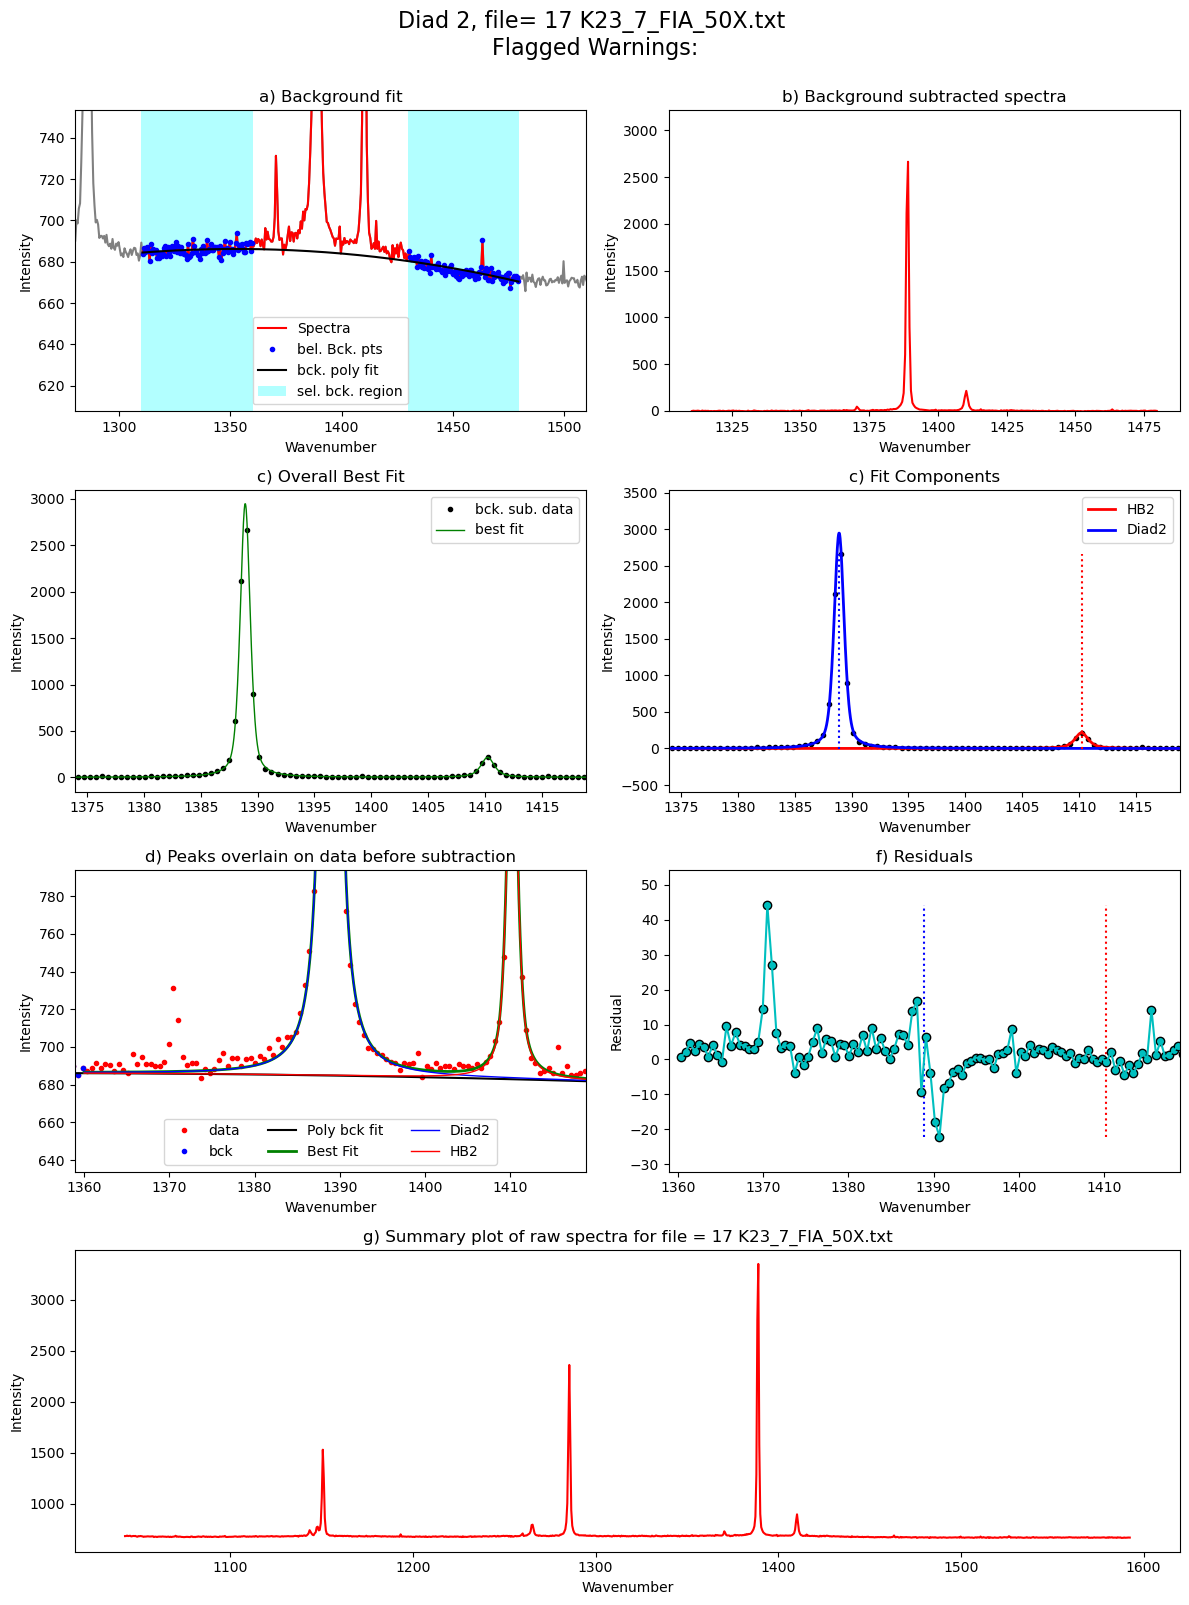

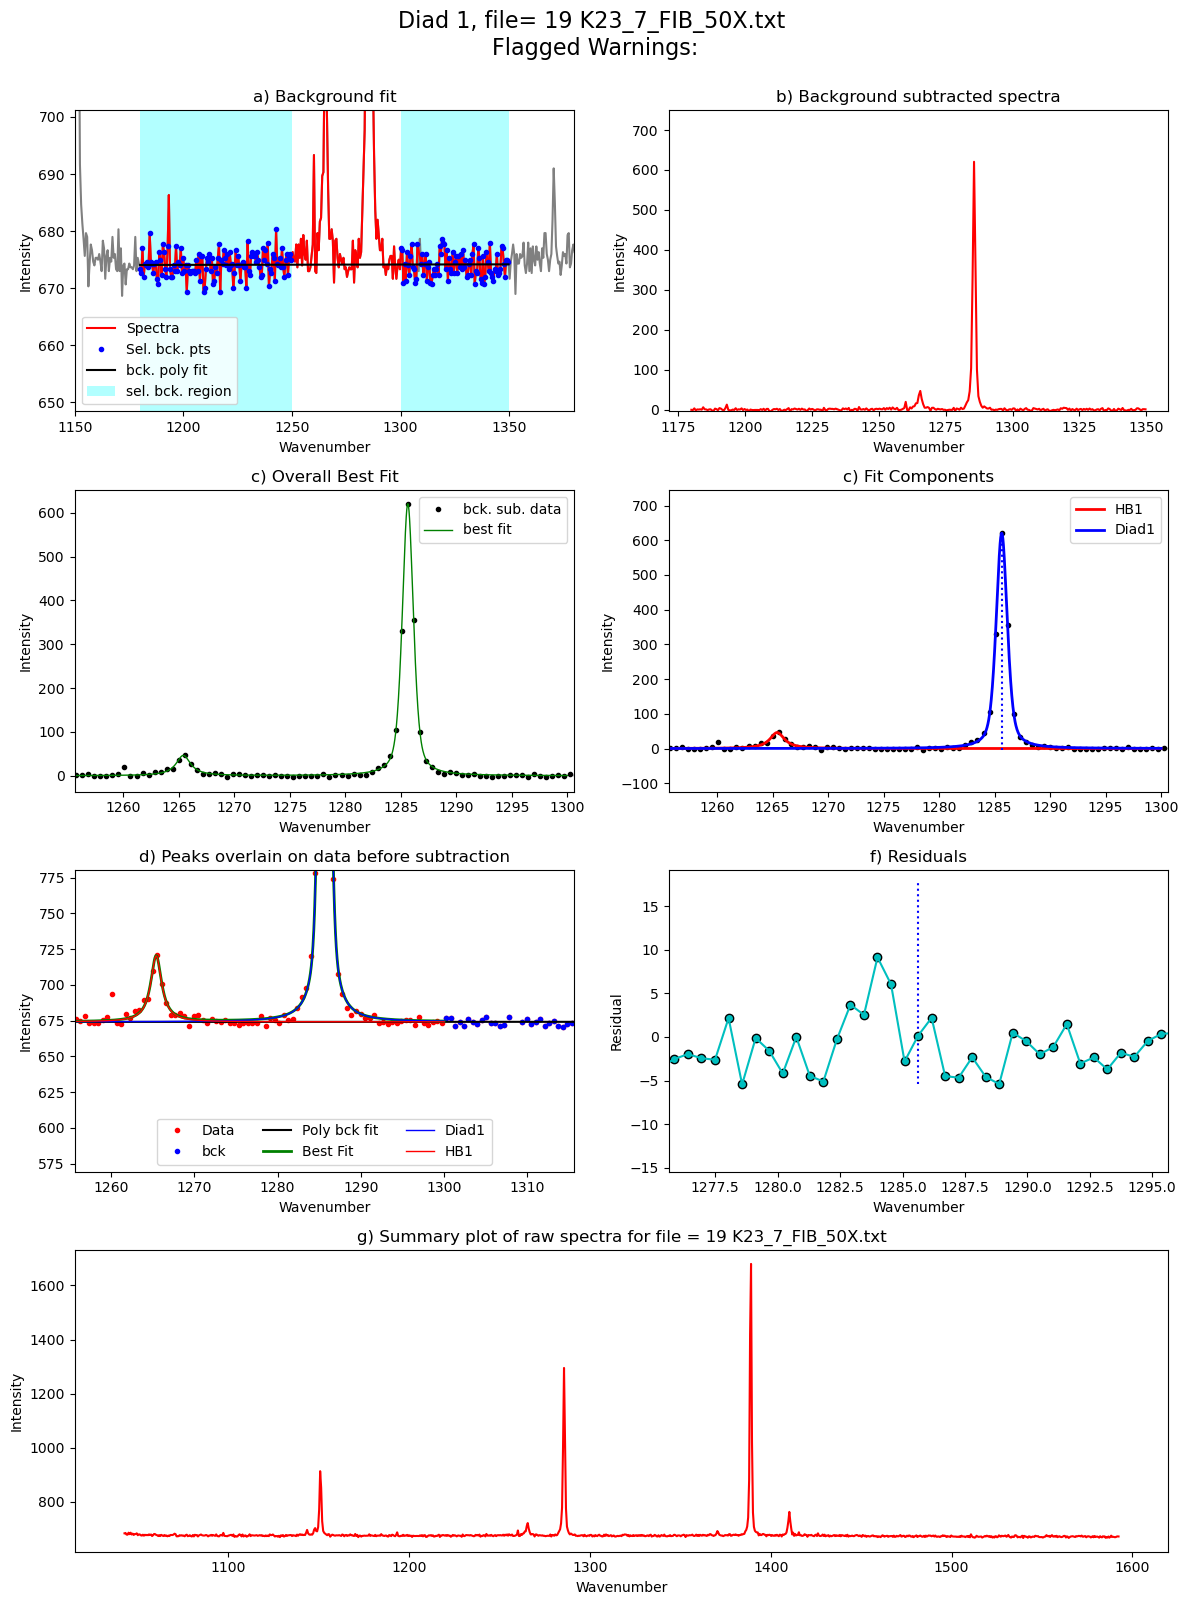

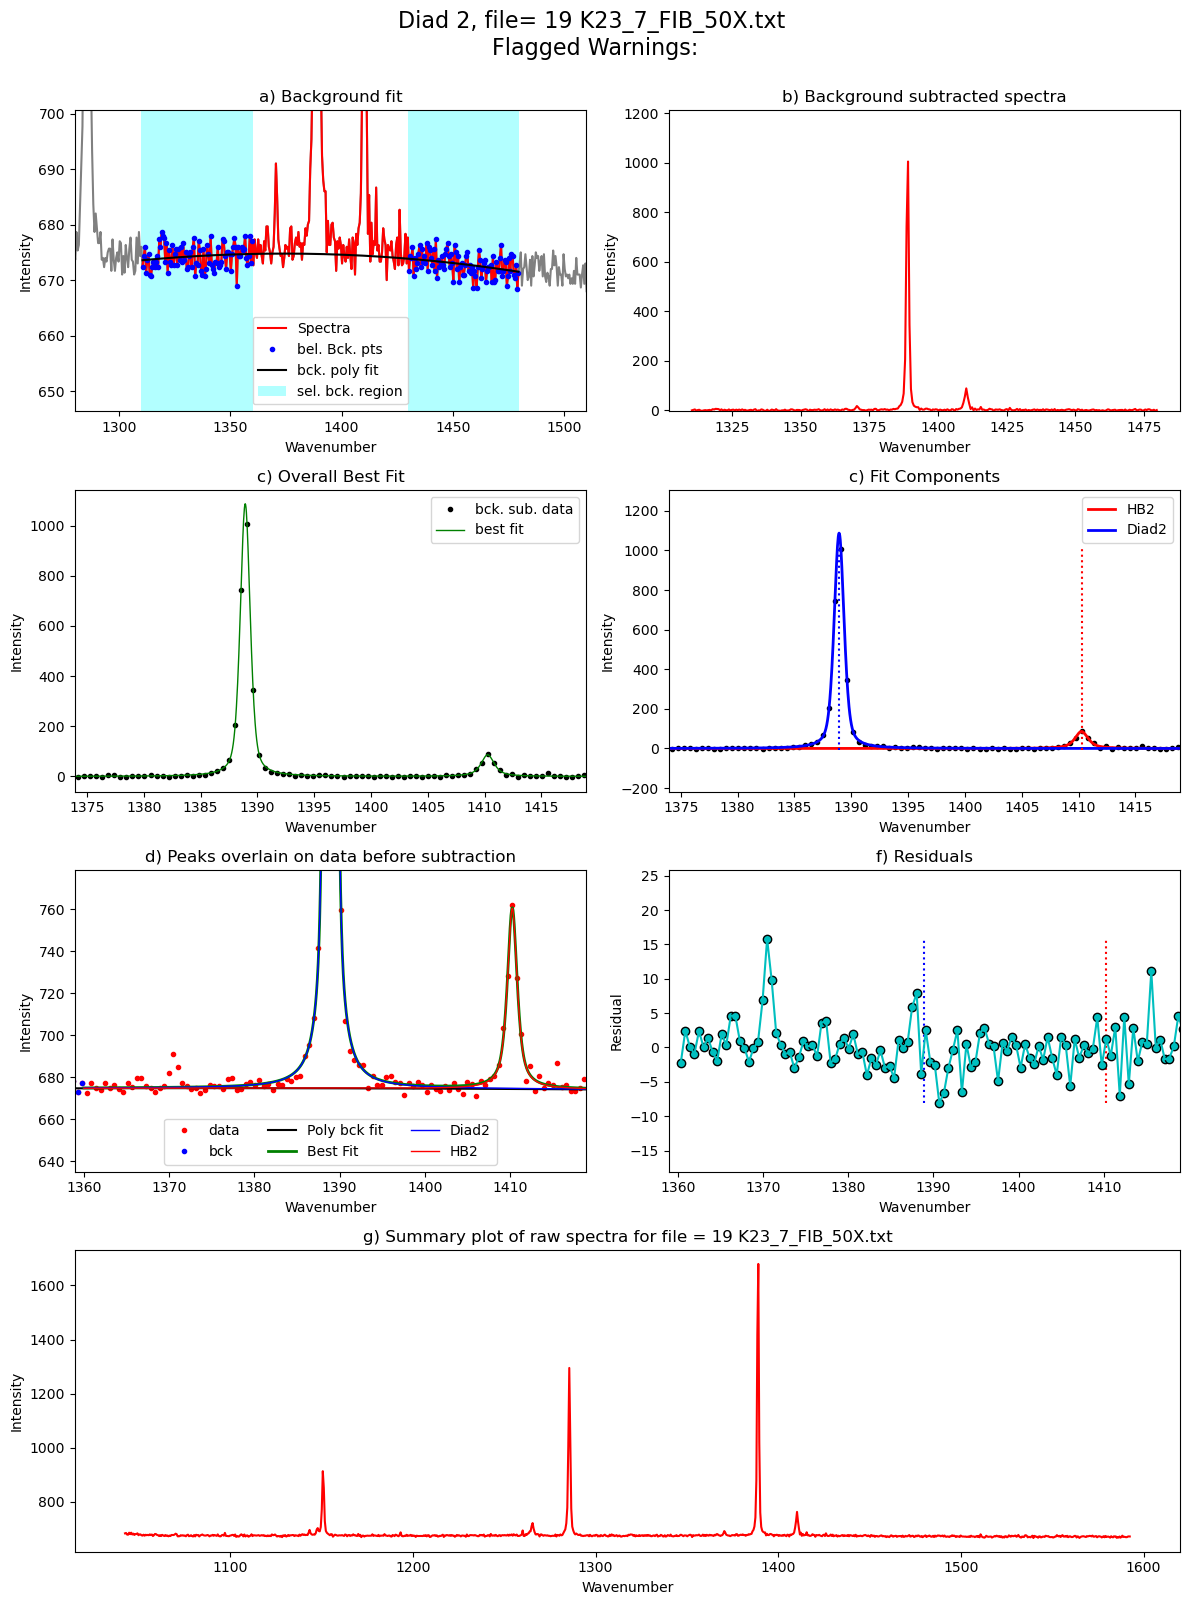

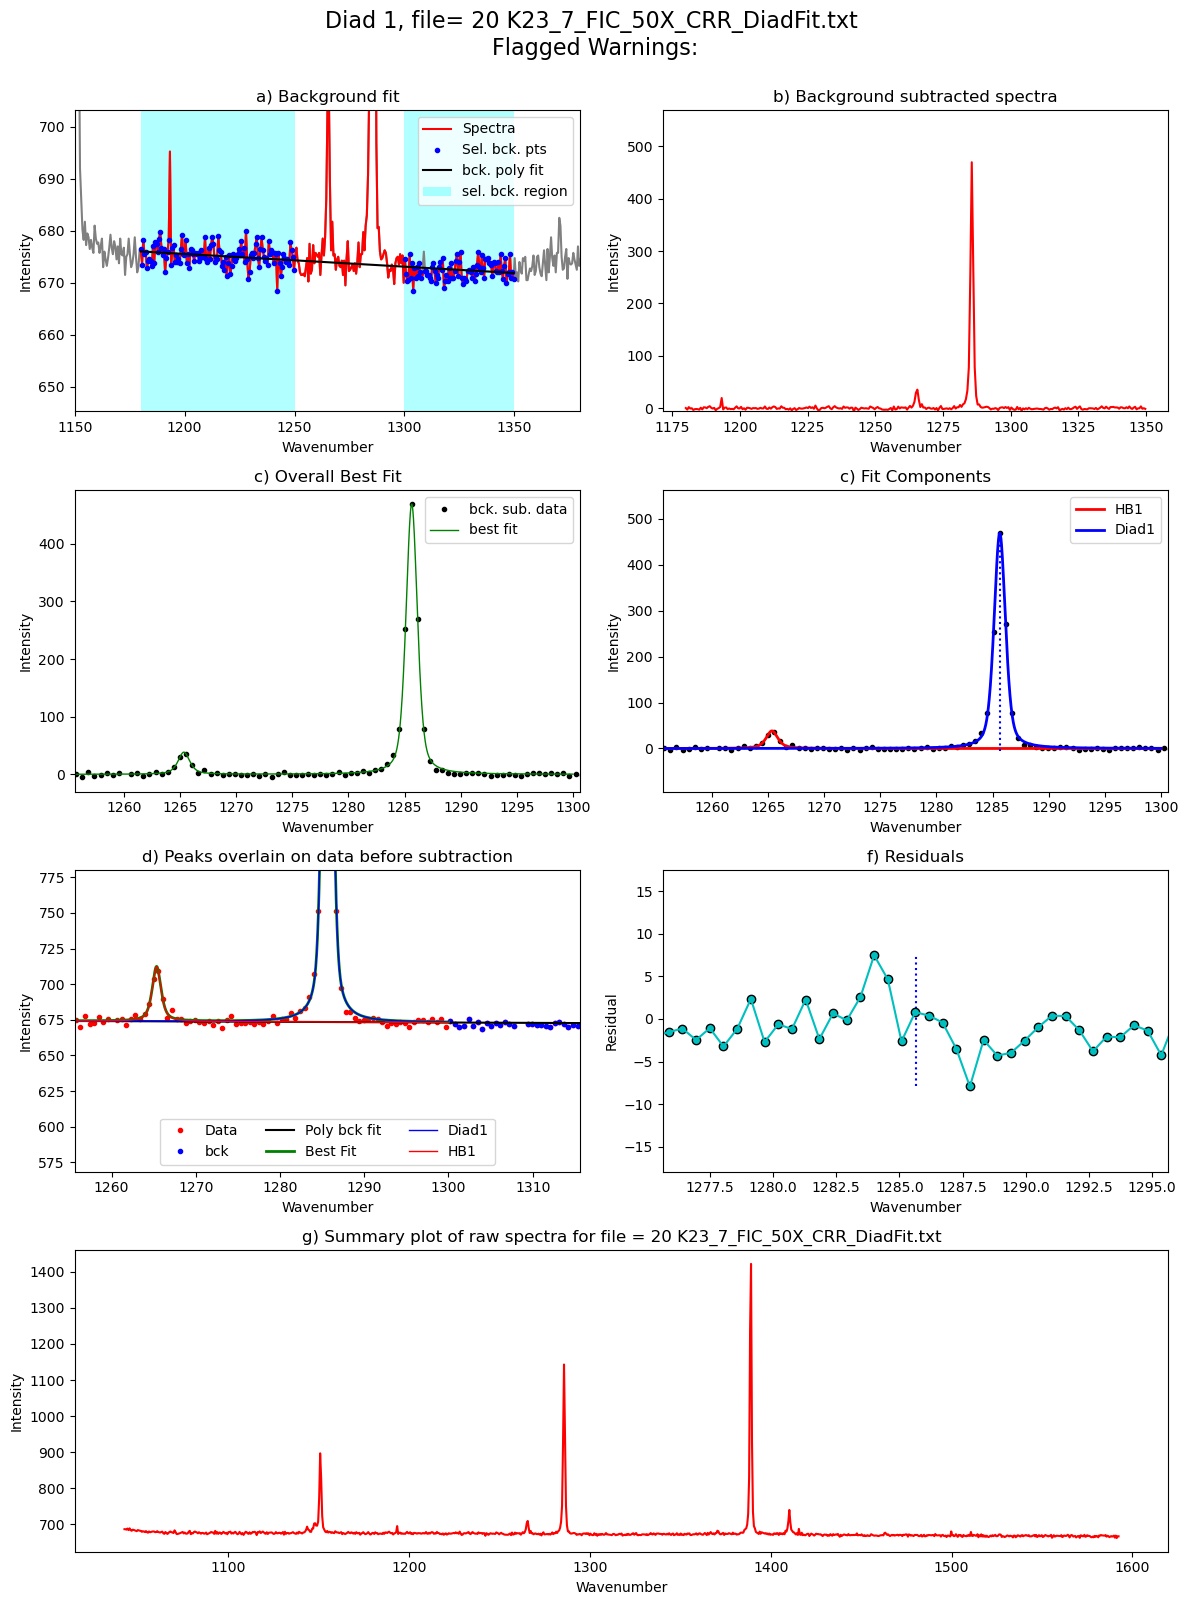

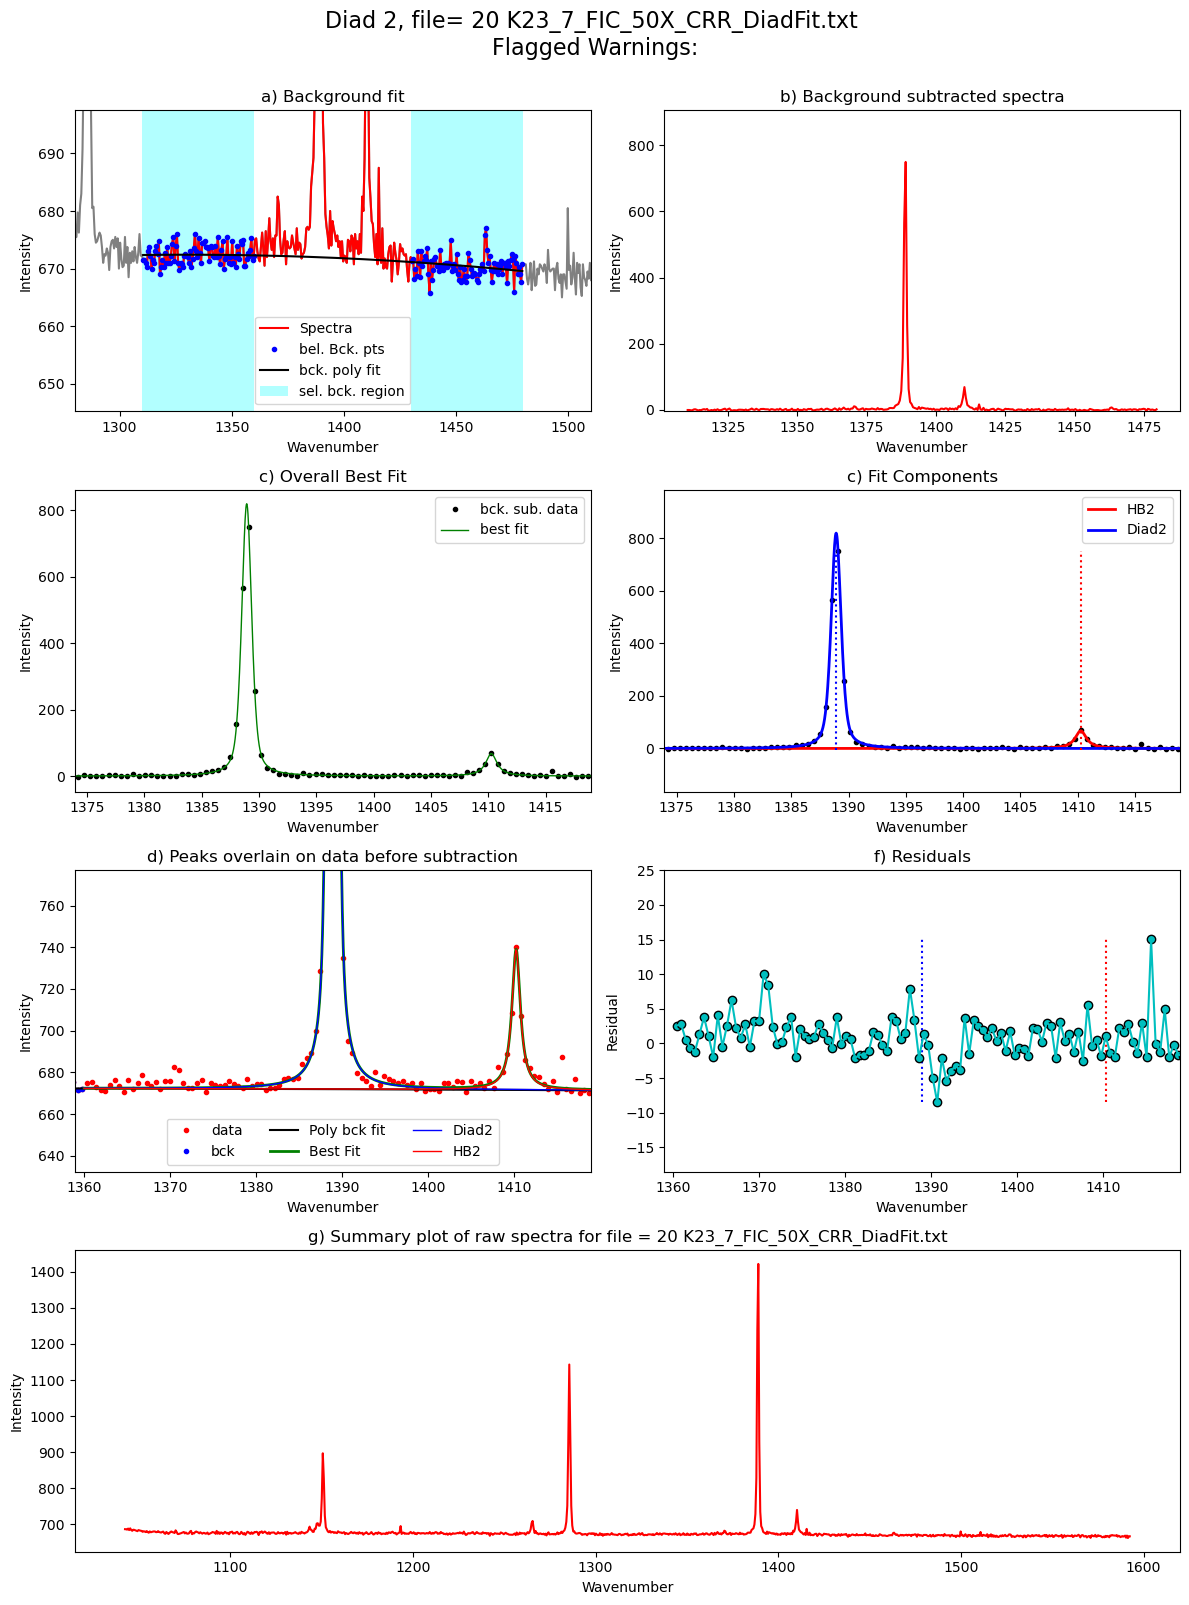

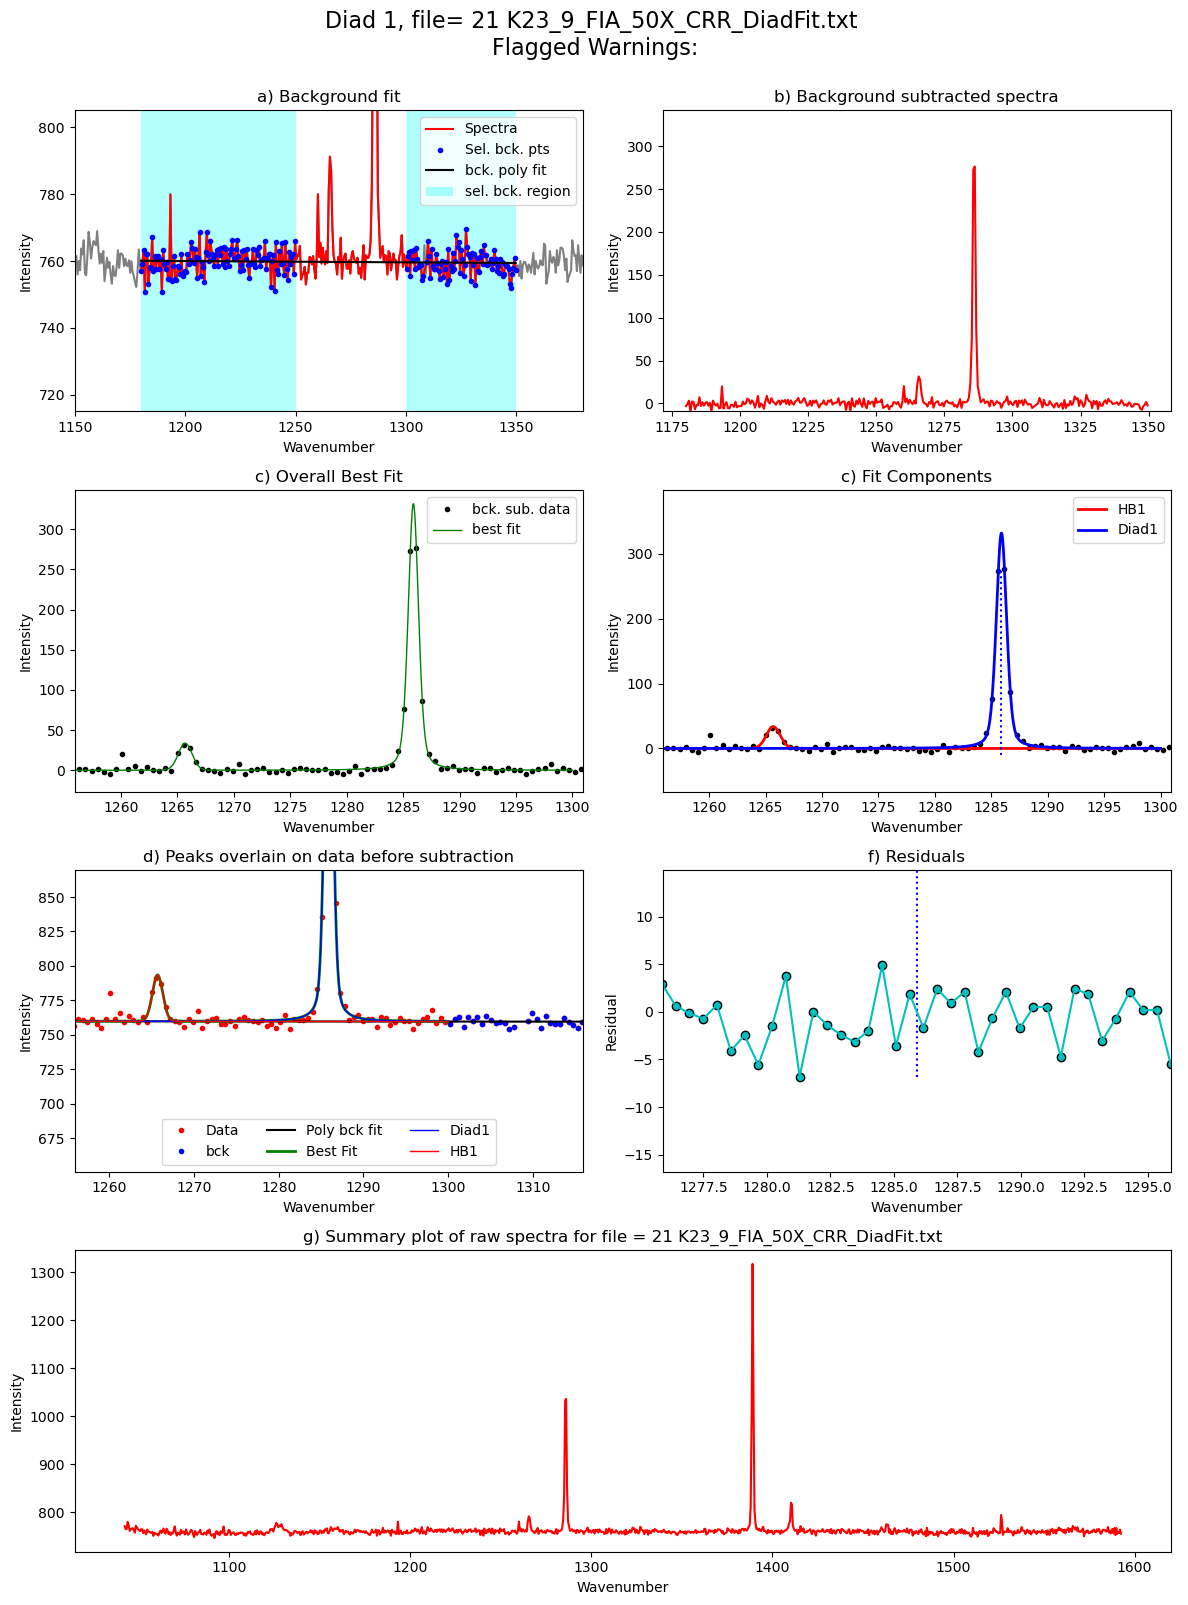

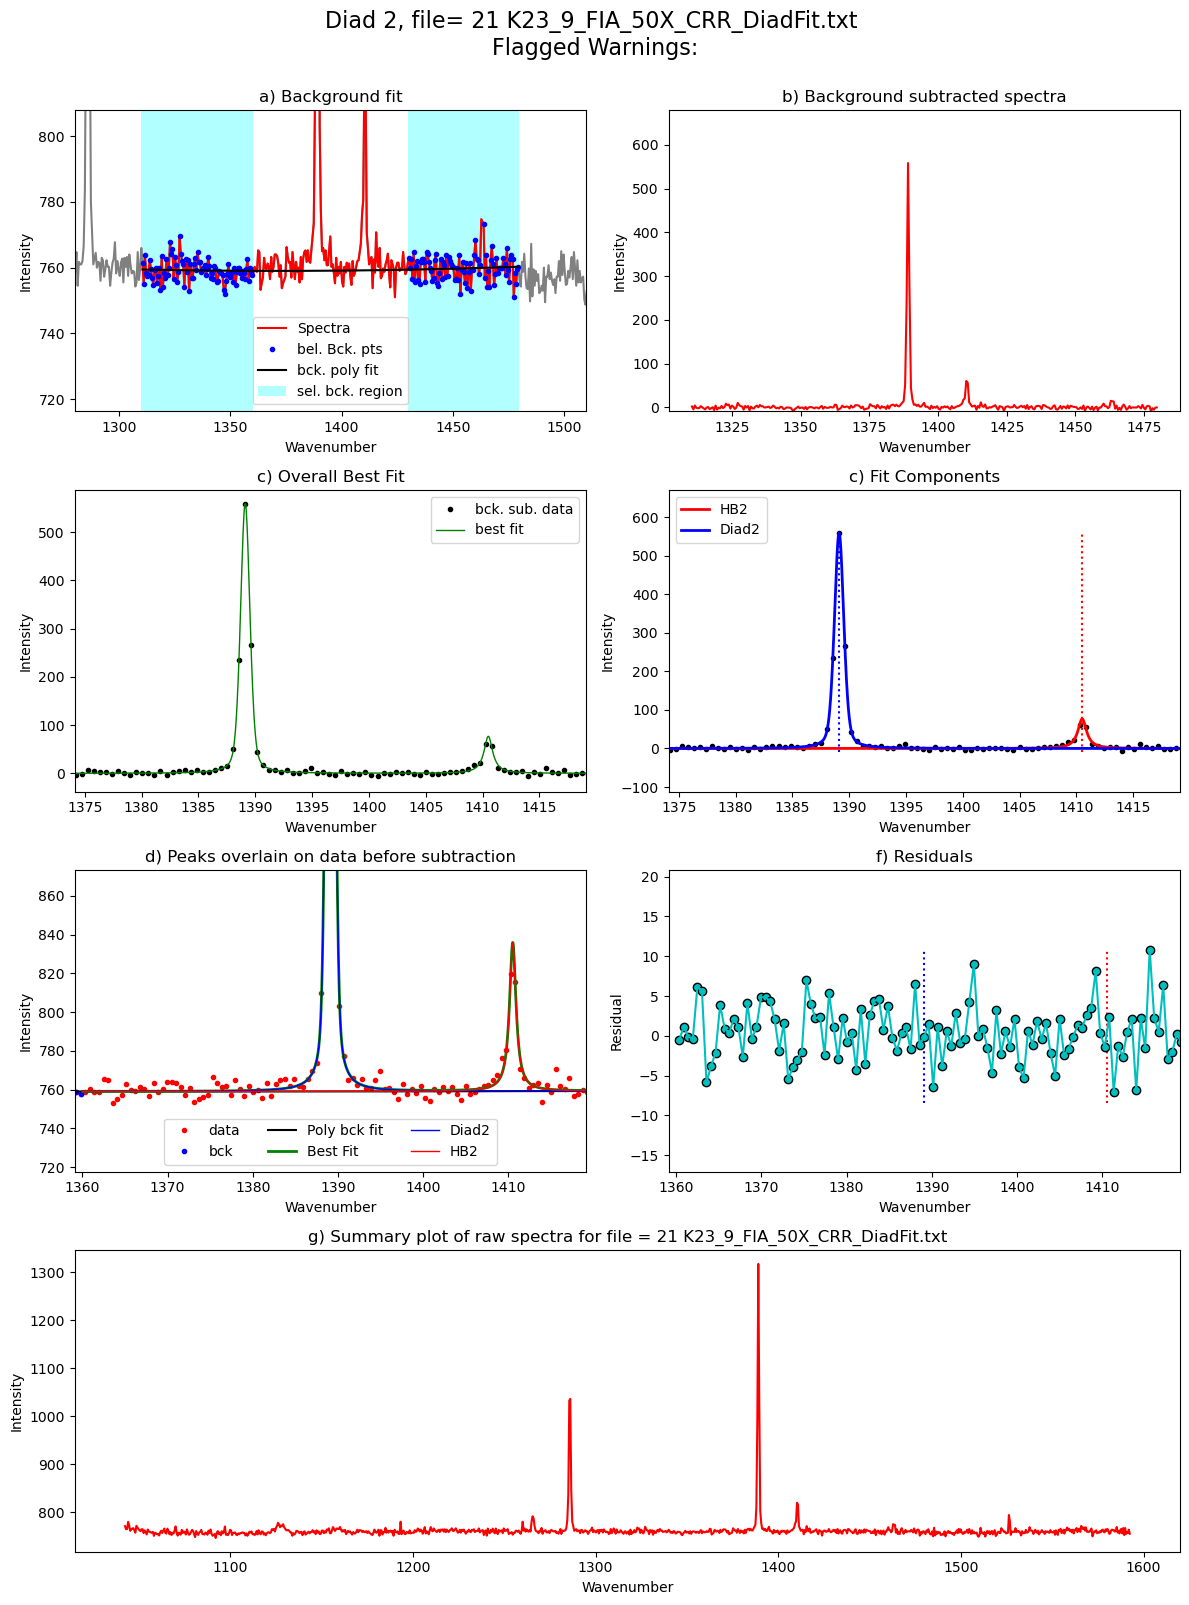

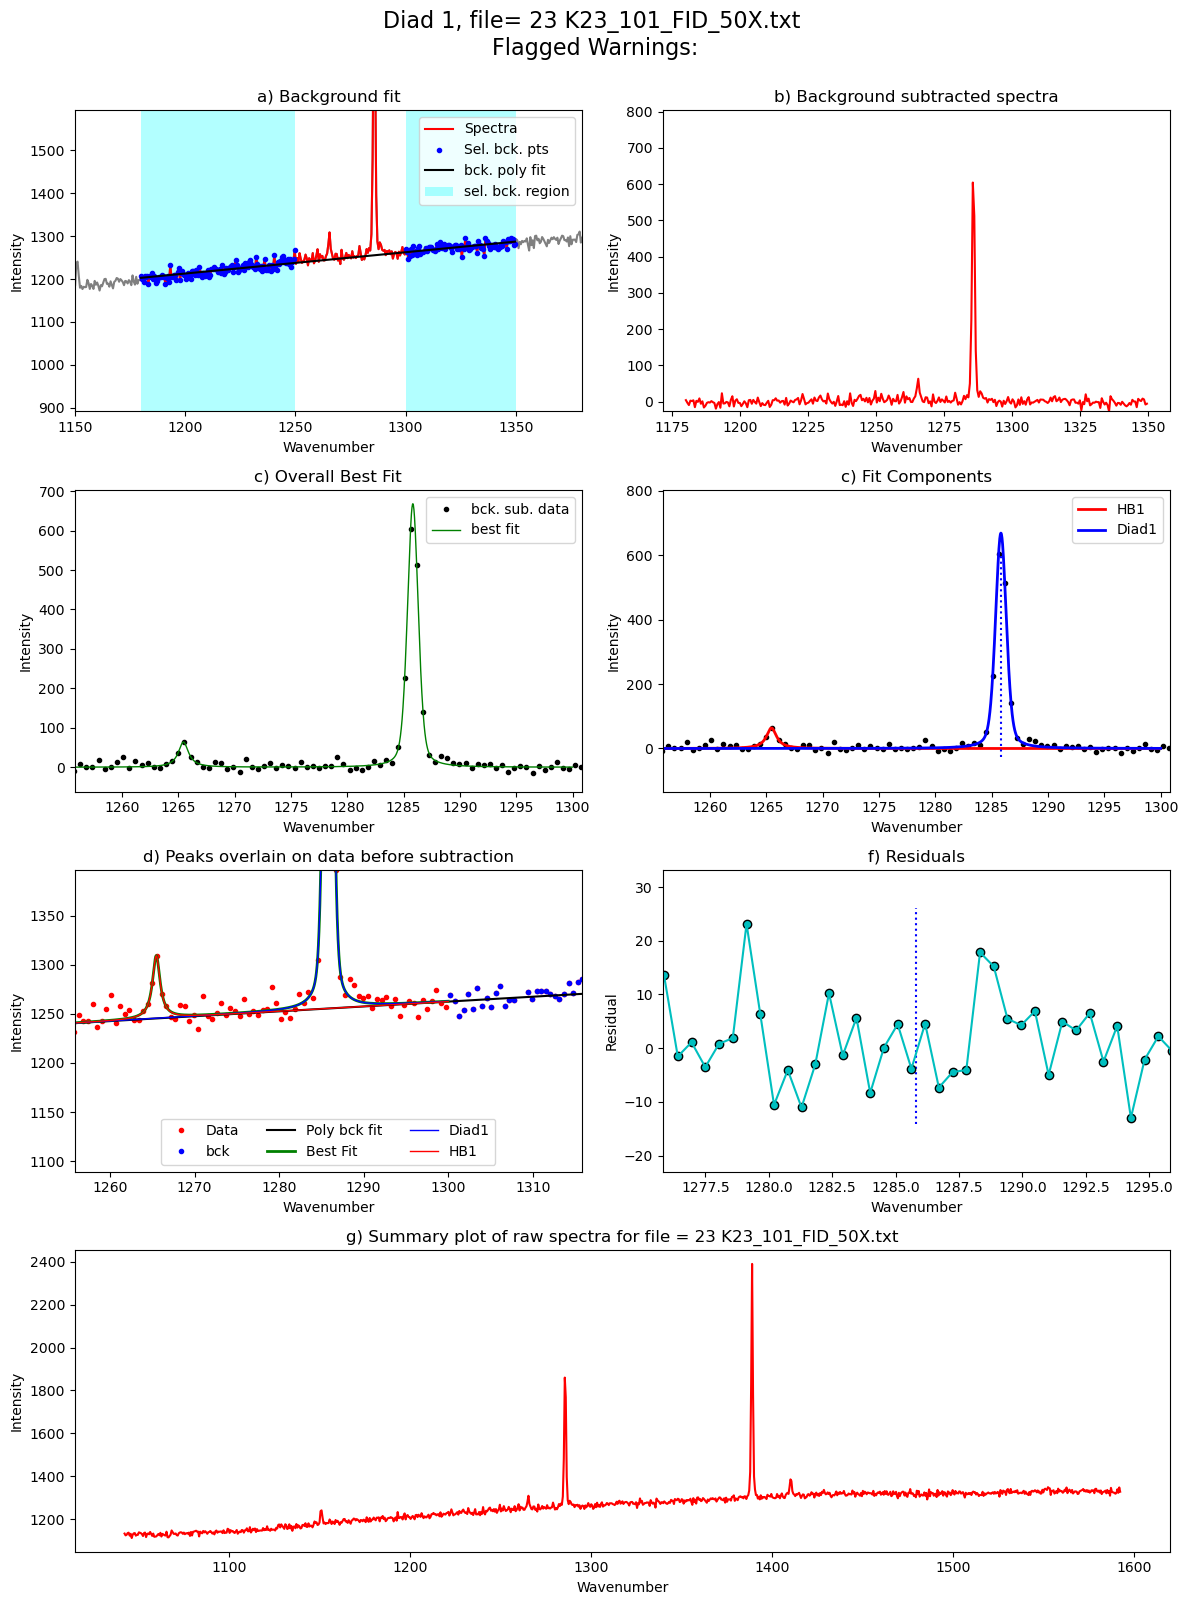

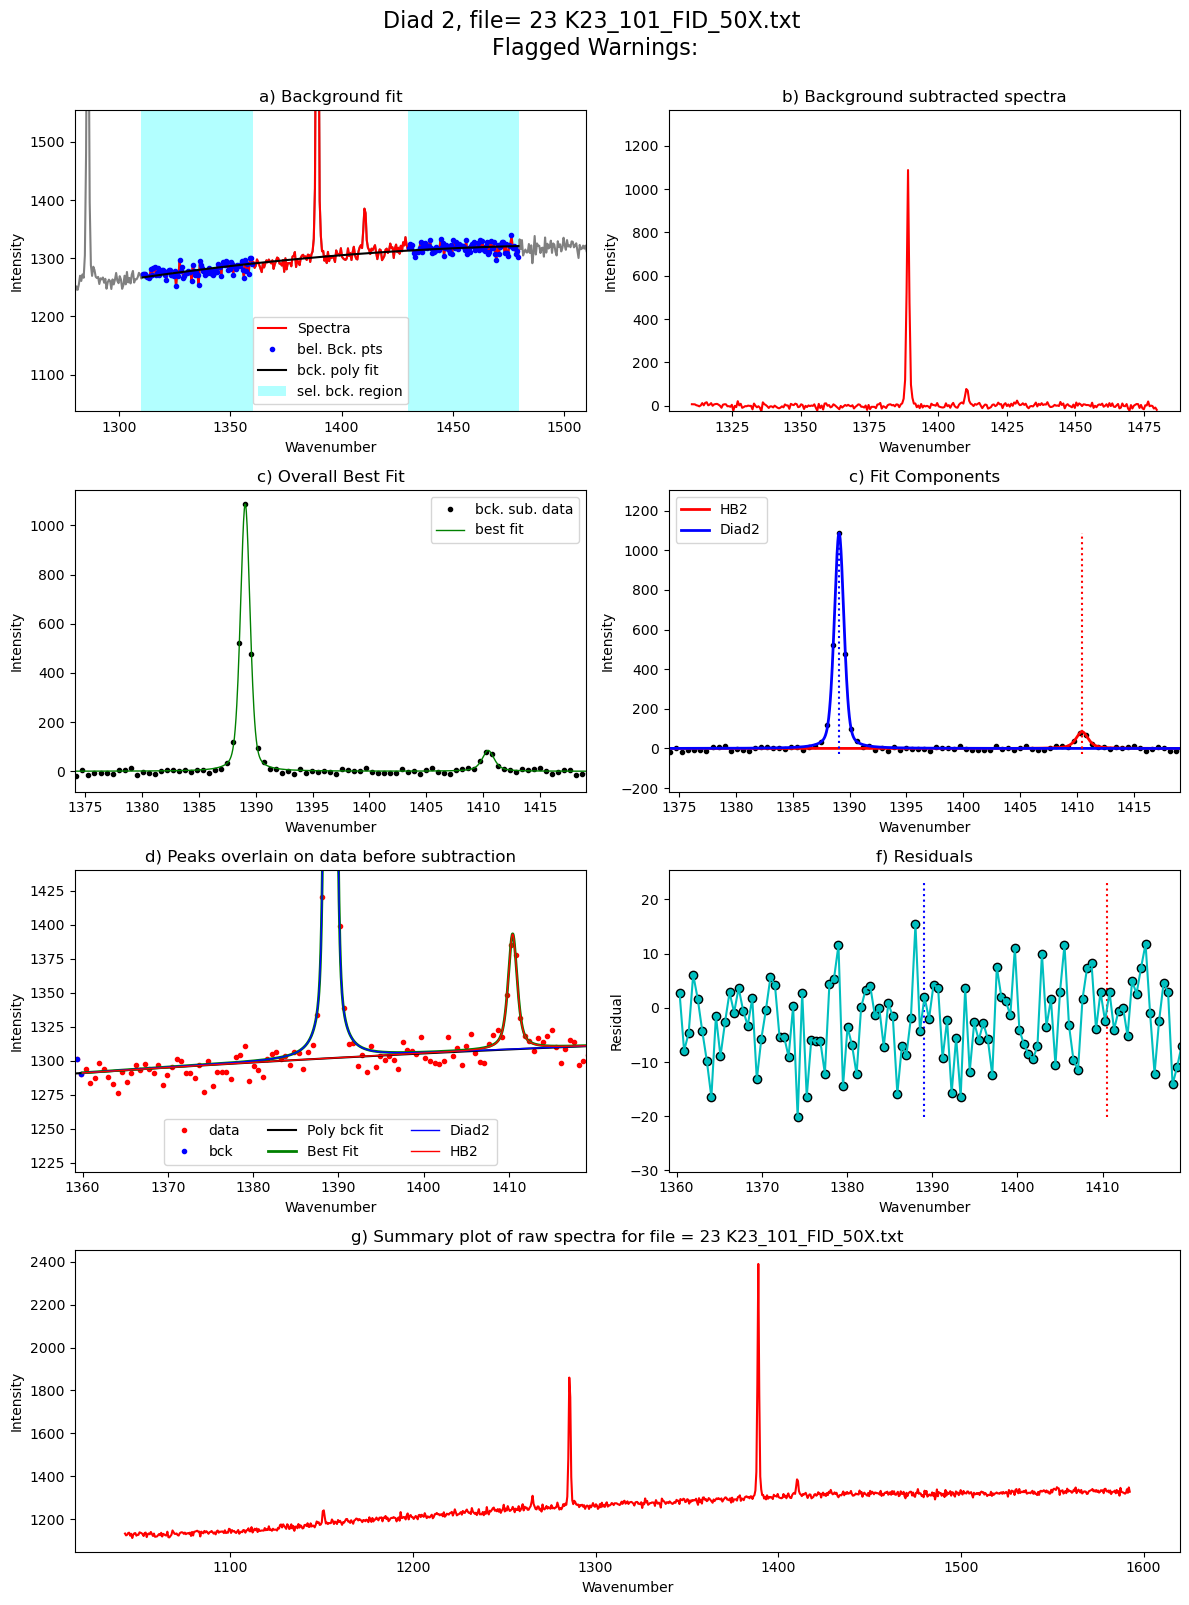

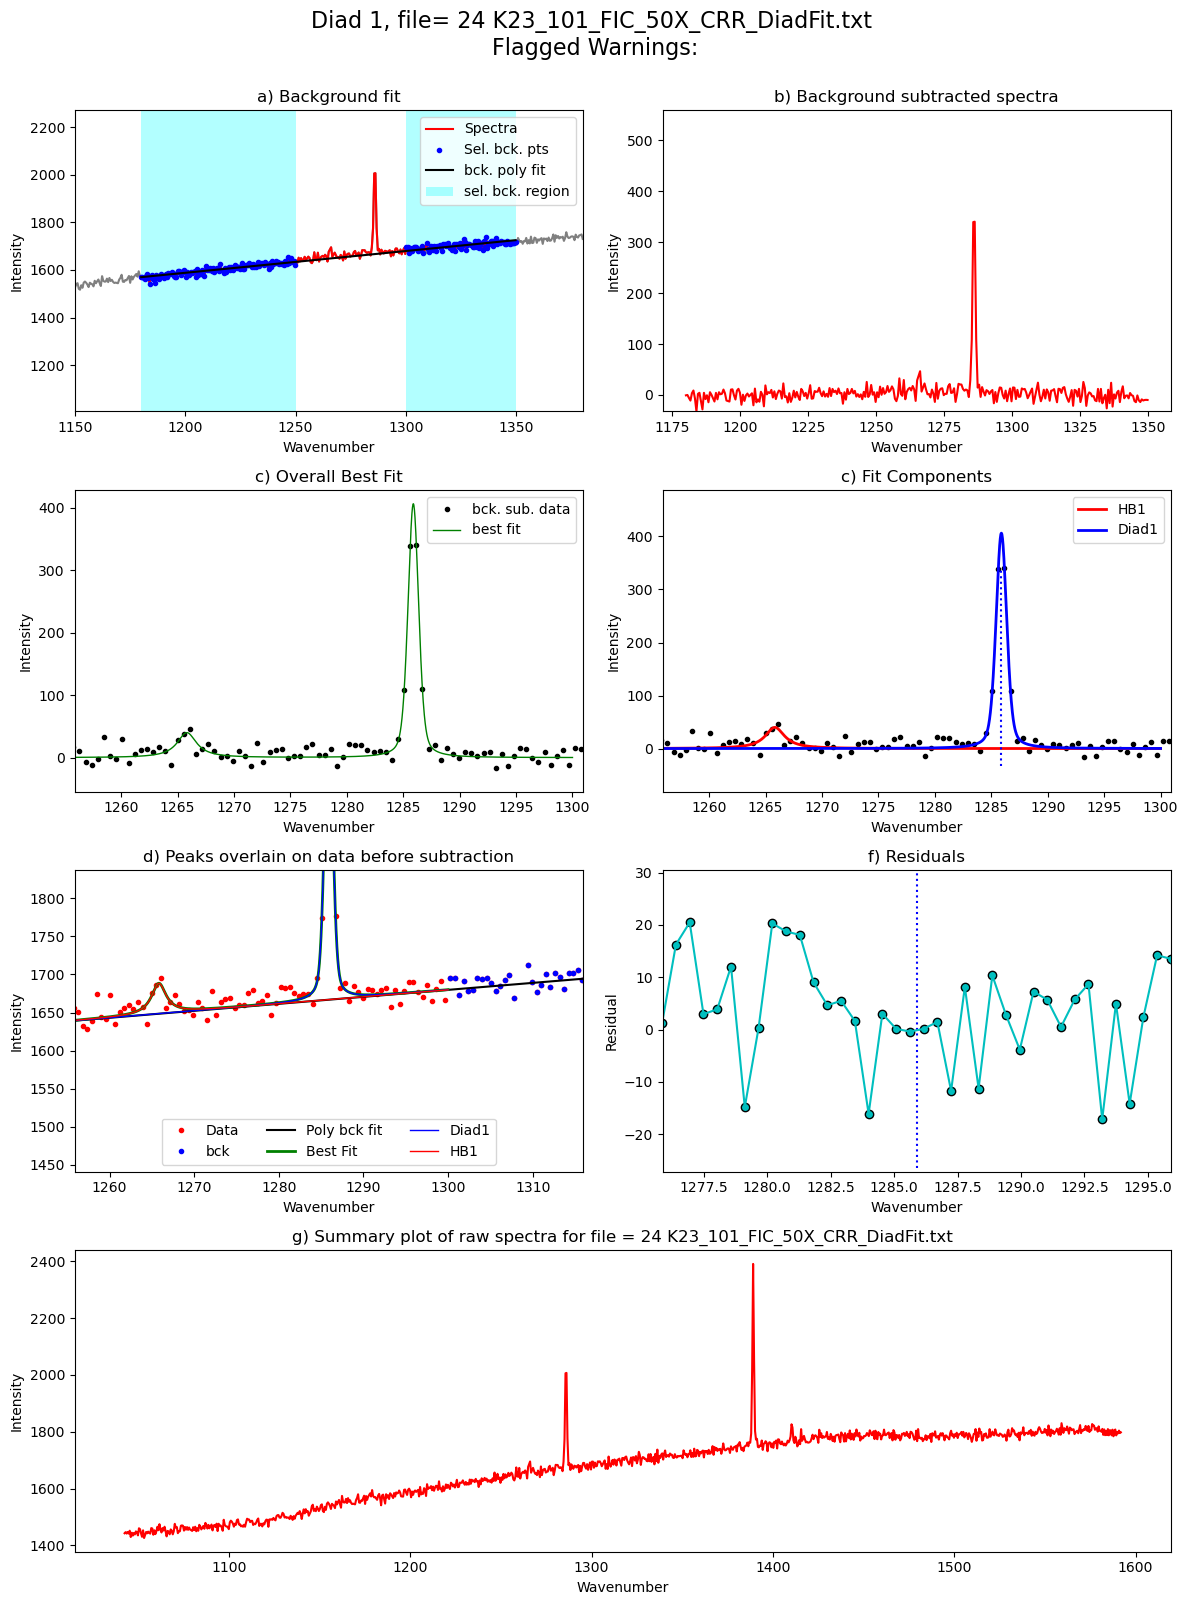

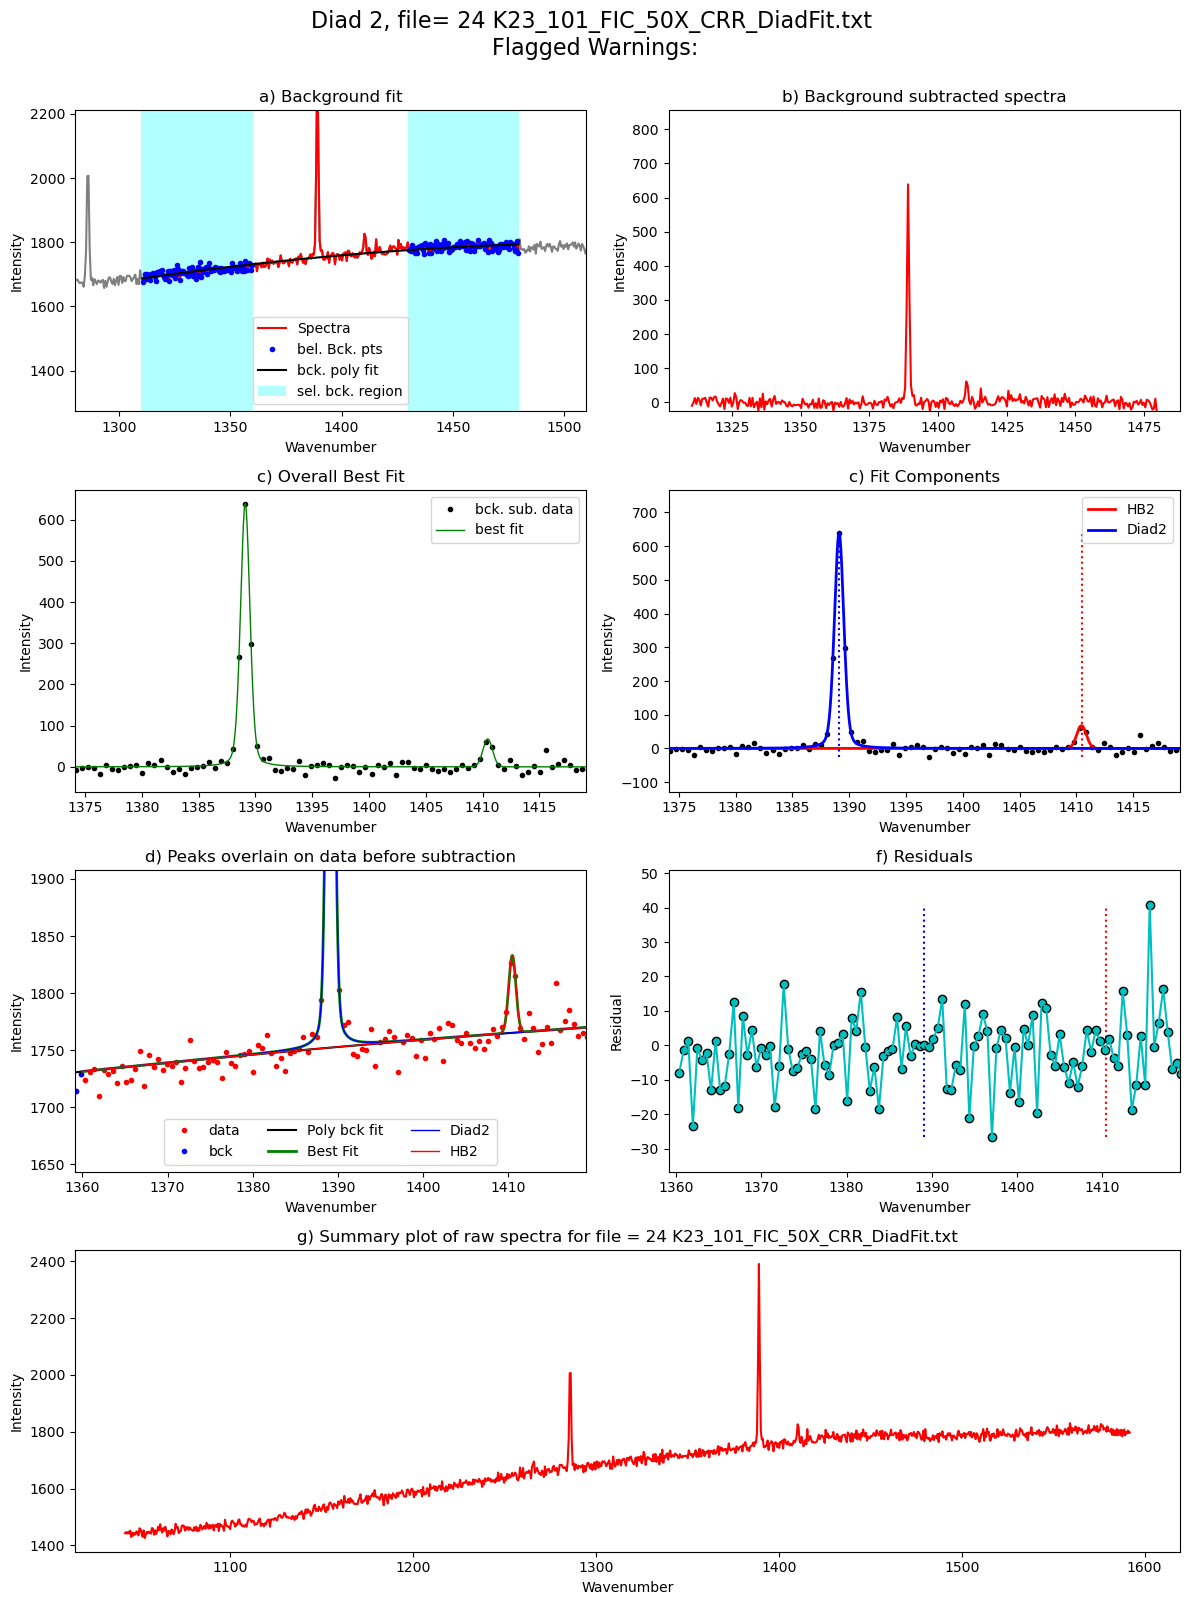

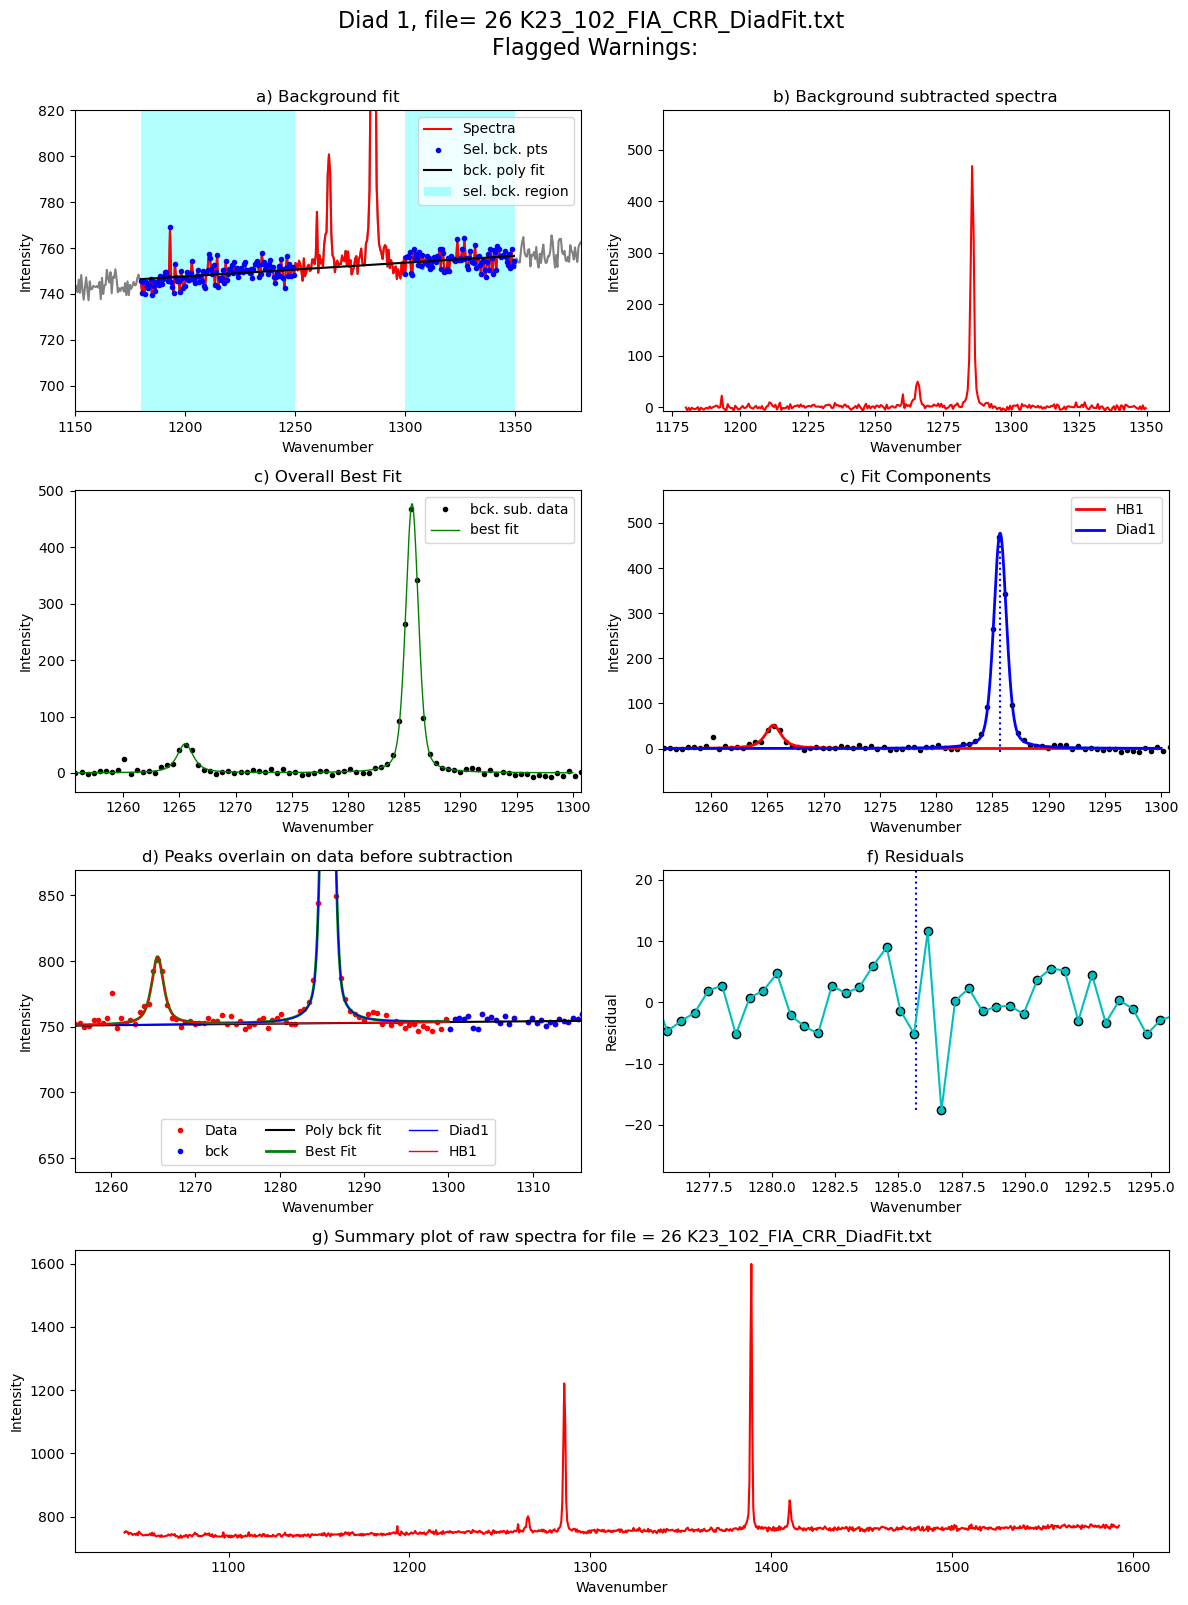

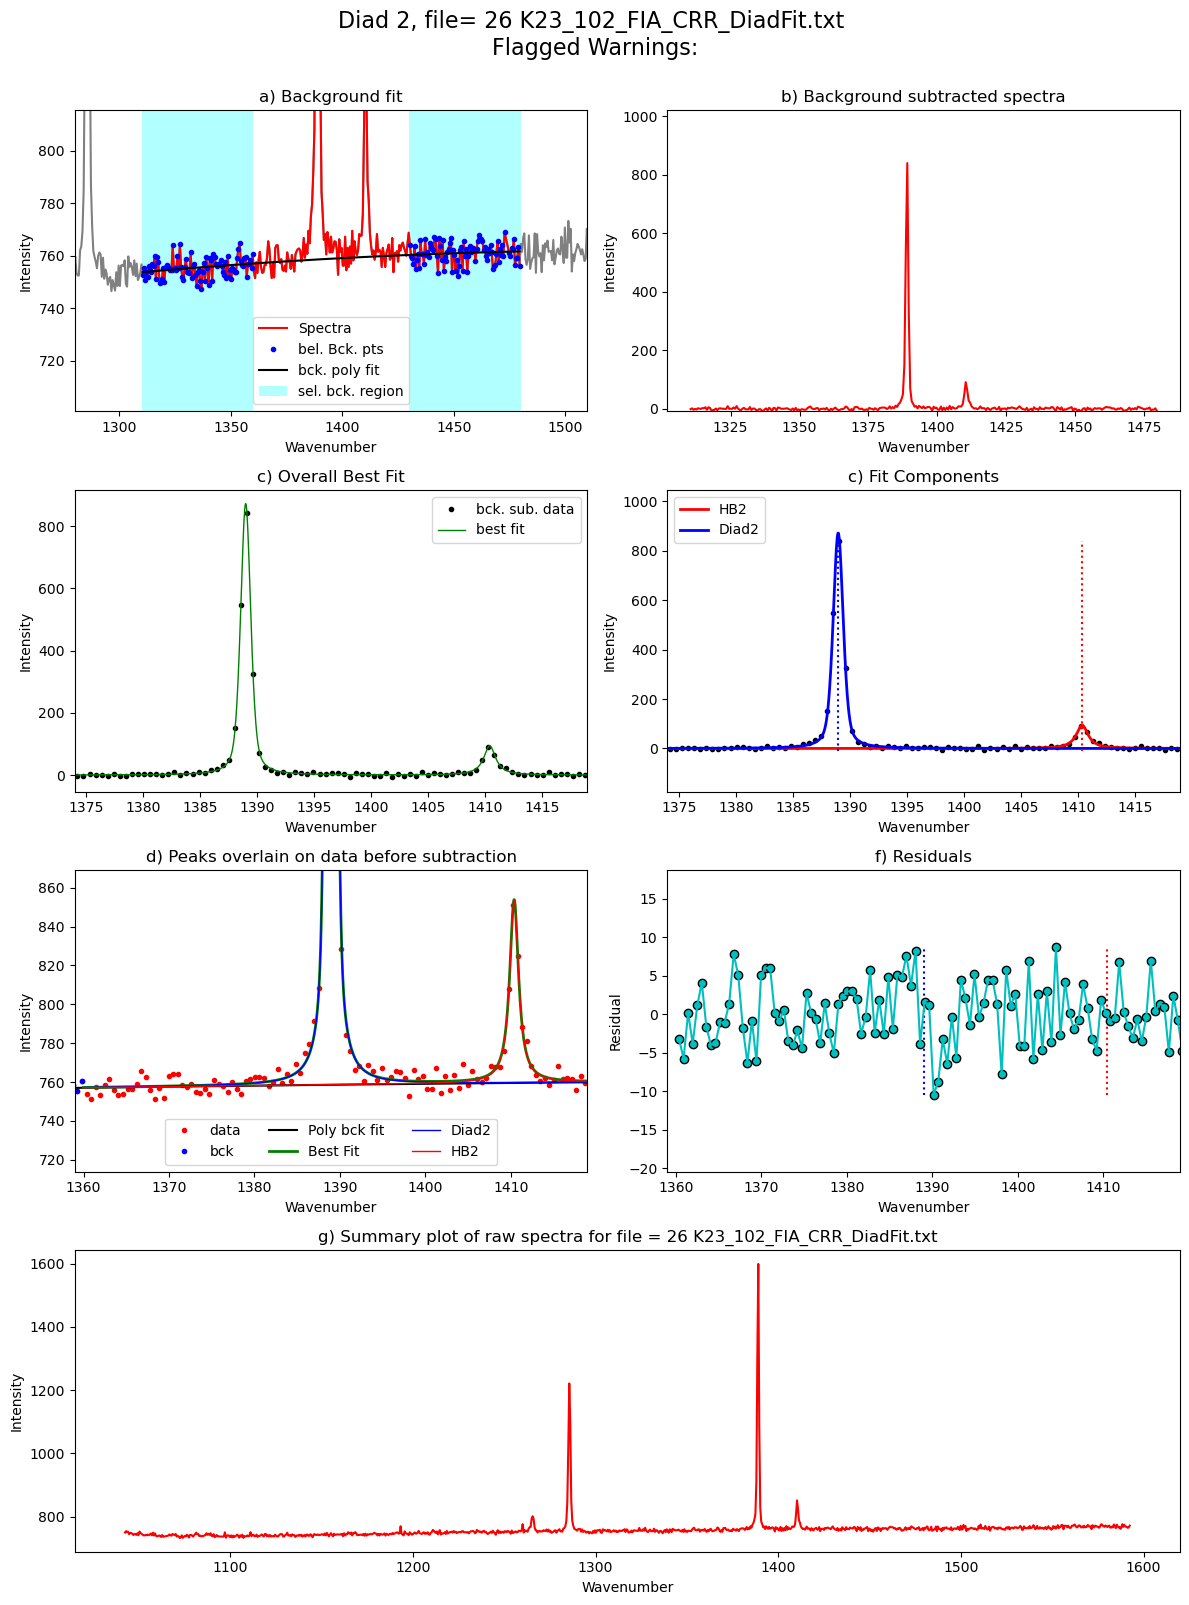

In [12]:
from tqdm import tqdm
plot_figure=True# If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    tqdm.write(f"Processing file: {Diad_Files[i]}")
    
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config_init.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config_init.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config_init.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=prefix, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0).reset_index(drop=True)


In [13]:
# Save parameters to excel
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx', index=False)
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx', index=False)
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx', index=False)

In [14]:
combo

filename   Splitting   Split_σ  Diad1_Combofit_Cent  \
0                K23_10_FIA_50X  103.321597  0.003499          1285.529855   
1                 K23_1_FIA_50X  103.356973  0.002187          1285.483474   
2     K23_1_FIA_50X_r2_longeraq  103.348095  0.001765          1285.494438   
3                 K23_2_FIA_50X  103.003054  0.032420          1286.359387   
4                 K23_2_FIB_50X  103.155017  0.003336          1285.990417   
5     K23_2_FIC_50X_CRR_DiadFit  103.173879  0.004489          1285.955244   
6     K23_4_FIA_50X_CRR_DiadFit  103.088332  0.007132          1286.164409   
7                 K23_4_FIB_50X  103.317107  0.006756          1285.613589   
8                 K23_6_FIA_50X  103.330394  0.001511          1285.568831   
9                 K23_7_FIA_50X  103.295747  0.001836          1285.608748   
10                K23_7_FIB_50X  103.290061  0.003012          1285.637988   
11    K23_7_FIC_50X_CRR_DiadFit  103.283458  0.003529          1285.637301   
12    K23_9_FIA_50X_CRR_DiadFit  103.209512  0.007090          1285.903623   
13              K23_101_FID_50X  103.252086  0.008551          1285.820393   
14  K23_101_FIC_50X_CRR_DiadFit  103.216762  0.017266          1285.894349   
15      K23_102_FIA_CRR_DiadFit  103.284520  0.006011          1285.692317   

    Diad1_cent_err  Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0         0.003217            1366.809244       1285.529905       2180.498743   
1         0.001945            1293.306052       1285.483524       2058.897395   
2         0.001549            1856.198327       1285.494488       2970.509854   
3         0.029440              46.443630       1286.359387         46.283882   
4         0.002897             631.307044       1285.990467        772.581801   
5         0.003842             415.352280       1285.955294        534.626712   
6         0.006426             235.292436       1286.164409        270.818557   
7         0.006324             323.838499       1285.613589        490.582719   
8         0.001256            1945.508075       1285.568881       3042.258120   
9         0.001590            1678.154313       1285.608798       2690.727819   
10        0.002670             620.692594       1285.638038        964.546548   
11        0.003122             468.969784       1285.637351        724.451250   
12        0.006109             331.771359       1285.903673        447.489952   
13        0.007370             667.990801       1285.820443        936.640321   
14        0.014398             406.317962       1285.894399        568.099805   
15        0.005445             477.395157       1285.692367        795.862299   

    Diad1_Voigt_Sigma  Diad1_Residual  ...  Diad1_Gauss_Area  \
0            0.585752        6.004058  ...               NaN   
1            0.590886        3.925973  ...               NaN   
2            0.593064        4.691197  ...               NaN   
3            0.468985        1.839397  ...               NaN   
4            0.482237        2.542673  ...               NaN   
5            0.500169        2.188067  ...               NaN   
6            0.470953        2.039371  ...               NaN   
7            0.583221        2.594740  ...               NaN   
8            0.593421        3.704510  ...               NaN   
9            0.601835        3.798008  ...               NaN   
10           0.592075        2.421211  ...               NaN   
11           0.599128        1.889209  ...               NaN   
12           0.542970        2.547700  ...               NaN   
13           0.568180        6.244209  ...               NaN   
14           0.560155        8.591088  ...               NaN   
15           0.670134        3.378070  ...               NaN   

    Diad1_Gauss_Sigma Diad1_Asym50  Diad1_Asym70  Diad1_Yuan2017_sym_factor  \
0                 NaN     1.164134      1.152174                   0.192283   
1                 NaN     1.181009      1.146552                   0.21

### This plays a sound when the notebook is done if you have a tendency to procrastinate

In [15]:
# !pip install winotify

from winotify import Notification, audio

toast= Notification(app_id="VSCode",title="Notebook completed",
                    msg="Step3b_Secondary_Peaks is done!",
                    duration="short")
toast.set_audio(audio.Mail,loop=False)
toast.show()